# UTMB Finish Times

Finish Times gives an idea of whether the ultra marathon runners are improving over time. It
offers an alternative outlook than Average Pace, as it only acknowledged finishers, rather than
the Average Pace of every participant. This allows for naive runners, who may begin the race at
an extremely fast pace, and subsequently drop out after a few stages. Their average pace would
make the overall average pace seem faster than it is.


In [390]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [391]:
df = pd.read_csv('../../data/1km_splits_full.csv', encoding = "ISO-8859-1")

In [392]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,...,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
0,0,NaN,2017,4.0,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),NaN,FR,...,NaN,NaN,7.788288,NaN,NaN,9.016667,5.236486,1141.900000,NaN,7.012357
1,1,NaN,2017,NaN,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),NaN,ES,...,NaN,NaN,7.869369,NaN,NaN,9.300000,5.072072,1156.983333,15.083333,7.097568
2,2,NaN,2017,14.0,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3.0,US,...,NaN,NaN,7.918919,NaN,NaN,9.804762,4.772523,1193.000000,51.100000,7.352225
3,3,3.0,2017,7.0,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4.0,FR,...,NaN,NaN,7.585586,NaN,NaN,9.238095,4.808559,1203.650000,61.750000,7.466542
4,4,4.0,2017,NaN,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5.0,US,...,NaN,NaN,8.414414,NaN,NaN,10.057143,5.141892,1211.633333,69.733333,7.211069


### Winning Times

We examined the winning times for the UTMB. 

In [393]:
df['rank'] = df['rank'].fillna(1, limit=1)
df['rank'] = df['rank'].fillna(2, limit=2) 

In [394]:
def f(x):
    x = x.fillna(1, limit=1)
    x = x.fillna(2, limit=2)   
    return x

df['rank'] = df.groupby('Year')['rank'].apply(f)
df

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,...,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
0,0,NaN,2017,4.0,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),1.0,FR,...,NaN,NaN,7.788288,NaN,NaN,9.016667,5.236486,1141.900000,NaN,7.012357
1,1,NaN,2017,NaN,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),2.0,ES,...,NaN,NaN,7.869369,NaN,NaN,9.300000,5.072072,1156.983333,15.083333,7.097568
2,2,NaN,2017,14.0,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3.0,US,...,NaN,NaN,7.918919,NaN,NaN,9.804762,4.772523,1193.000000,51.100000,7.352225
3,3,3.0,2017,7.0,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4.0,FR,...,NaN,NaN,7.585586,NaN,NaN,9.238095,4.808559,1203.650000,61.750000,7.466542
4,4,4.0,2017,NaN,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5.0,US,...,NaN,NaN,8.414414,NaN,NaN,10.057143,5.141892,1211.633333,69.733333,7.211069
5,5,5.0,2017,17.0,f94453abd655927dc15006974bce67ad,The North Face / Buff,Male,Senior Men (23-39),6.0,ES,...,NaN,NaN,8.288288,NaN,NaN,10.135714,4.556306,1212.716667,70.816667,7.505718
6,6,6.0,2017,9.0,5a376cf8730a72a85ed45ec976ce3ccf,The North Face,Male,Senior Men (23-39),7.0,US,...,NaN,NaN,8.612613,NaN,NaN,10.540476,5.195946,1219.800000,77.900000,7.531904
7,7,7.0,2017,13.0,f9afc937b3b009afc6def5029e0cf169,VIBRAM,Male,Senior Men (23-39),8.0,LT,...,NaN,NaN,8.851351,NaN,NaN,10.933333,5.355856,1284.316667,142.416667,8.141435
8,8,8.0,2017,8.0,bf7a0557fac70cfc49d7d7c67bccf3e7,THE NORTH FACE,Male,Senior Men (23-39),9.0,US,...,NaN,NaN,12.373874,NaN,NaN,11.380952,5.736486,1288.533333,146.633333,8.106394
9,9,9.0,2017,32.0,95871c39869bcf74aa962458a3569c46,COMPRESSPORT,Male,Senior Men (23-39),10.0,ES,...,NaN,NaN,9.171171,NaN,NaN,11.426190,6.222973,1304.516667,162.616667,8.047702


In [395]:
top = df[df['rank'] == 1]

In [396]:
top2 = df[df['rank'] == 2]

In [397]:
top2 = top2[top2['Year'] == 2016]

In [398]:
top = top.append(top2)

In [399]:
top = top.drop(2536)

In [400]:
top

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,...,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
0,0,NaN,2017,4.0,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),1.0,FR,...,NaN,NaN,7.788288,NaN,NaN,9.016667,5.236486,1141.900000,NaN,7.012357
5089,5089,NaN,2015,8.0,93f20063908ba5d48724dcf31740a52a,ASICS,Male,Senior Men (23-39),1.0,FR,...,12.850649,NaN,NaN,9.313131,NaN,NaN,5.747748,1269.250000,NaN,7.761441
7650,7650,NaN,2014,NaN,7efc0cb7e70d7cd9da46a58bbf01af66,TEAM SALOMON INTERNATIONAL,Male,Senior Men (23-39),1.0,FR,...,10.567100,NaN,NaN,8.414141,NaN,NaN,5.936937,1211.733333,NaN,7.408082
10081,10081,NaN,2013,2212.0,93f20063908ba5d48724dcf31740a52a,ASICS,Male,Senior Men (23-39),1.0,FR,...,11.911255,NaN,NaN,5.459596,NaN,NaN,6.290541,1234.950000,NaN,8.181262
12549,12549,NaN,2011,1501.0,1e4ba9a22b3fecb9136ecfcf7f470868,SALOMON,Male,Senior Men (23-39),1.0,ES,...,NaN,6.351852,NaN,NaN,5.886973,NaN,NaN,1236.716667,NaN,7.416191
14917,14917,NaN,2009,NaN,1e4ba9a22b3fecb9136ecfcf7f470868,SALOMON SANTIVERI,Male,Youth Men (20-22),1.0,ES,...,10.686147,NaN,NaN,6.469697,NaN,NaN,5.826577,1293.300000,NaN,8.031651
17203,17203,NaN,2008,4048.0,1e4ba9a22b3fecb9136ecfcf7f470868,SALOMON SANTIVERI,Male,Youth Men (20-22),1.0,ES,...,12.761905,NaN,NaN,6.545455,NaN,NaN,5.765766,1256.983333,NaN,7.599352
2535,2535,NaN,2016,25.0,5ee43fe1b1a374d8ed73da6ad820e176,HOKA - CABB,Male,Masters Men 1 (40-49),2.0,FR,...,11.049784,NaN,NaN,8.191919,NaN,NaN,5.727477,1320.033333,NaN,7.935198


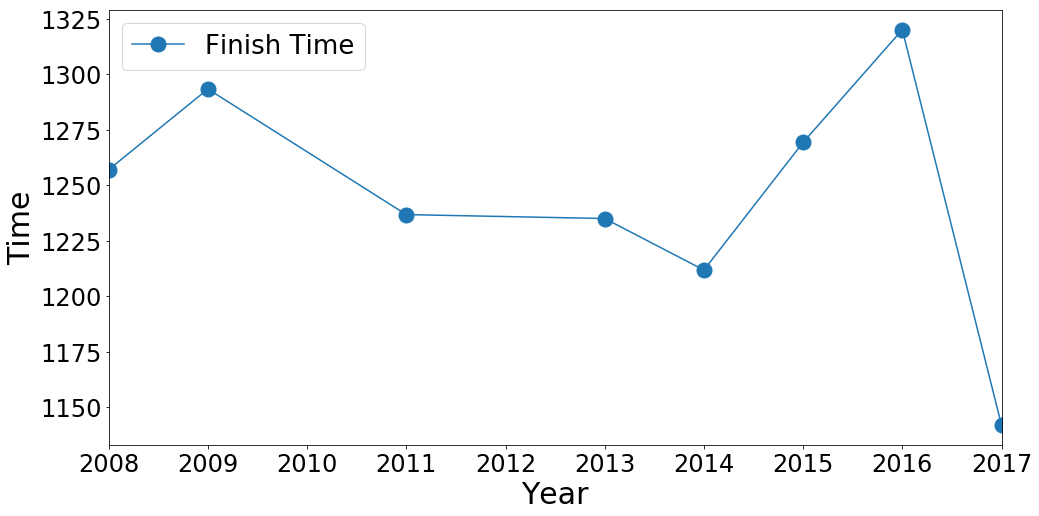

In [567]:
gen = top.groupby(['Year'])['time'].mean()
ax = gen.plot(figsize=(16, 8), fontsize=24, marker='o', ms=15)
ax.set_ylabel('Time', fontsize = 30)
ax.set_xlabel('Year', fontsize = 30)
ax.legend(['Finish Time'], frameon=True, ncol=2, loc='upper left', fontsize = 26)

The winning time in 2014 is faster than that of 2013, whereas the mean finish time is almost 20 minutes
slower. 2016 is the slowest finish time. Again, this is peculiar as it has the exact same route as 2015. There is almost 50 minutes in the difference in terms of winning time. Having investigated
the reasons for this further a UTMB race review article seemed to contain the reasons for the
slow 2016 race. It states the race was held in severe heat and humidity. This would certainly
fatigue runners quicker, so many participants would have slowed their pace in order to conserve
energy.

In [402]:
test = df

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 52 columns):
Unnamed: 0                      19579 non-null int64
Unnamed: 0.1                    19555 non-null float64
Year                            19579 non-null int64
bib                             19565 non-null float64
name_mask                       19579 non-null object
team                            14676 non-null object
gender                          19579 non-null object
category                        19579 non-null object
rank                            19579 non-null float64
nationality                     19579 non-null object
Chamonix to Delevret            14876 non-null float64
Chamonix to La Charme           1423 non-null float64
Chamonix to St-Gervais          2281 non-null float64
Delevret to St-Gervais          14866 non-null float64
La Charme to St-Gervais         2090 non-null float64
St-Gervais to Contamines        19202 non-null float64
Contamines to La Balme 

### Average Finish Time

In [404]:
df.groupby(['Year', 'gender'])['time'].mean().unstack()

gender,Female,Male
Year,,
2008,2470.362963,2374.534709
2009,2472.892904,2383.206279
2011,2408.016667,2404.571898
2013,2445.051310,2363.585037
2014,2441.672368,2380.664169
2015,2429.827778,2392.560796
2016,2460.198346,2416.884904
2017,2385.263832,2355.039567


Text(0.5,0,'Gender')

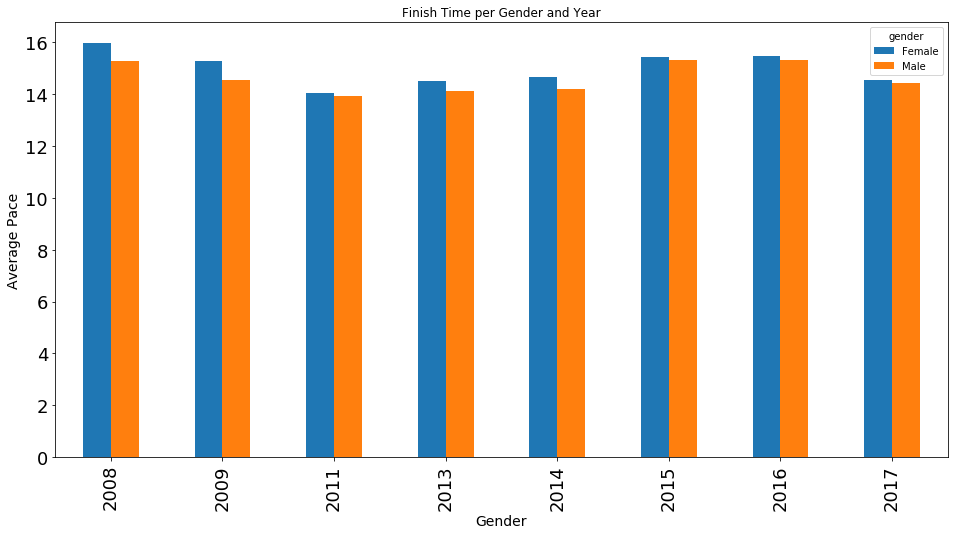

In [405]:
gen = df.groupby(['Year', 'gender'])['AVG_Pace'].mean().unstack()
ax = gen.plot.bar(figsize=(16, 8), title='Finish Time per Gender and Year', fontsize=18)
ax.set_ylabel('Average Pace', fontsize = 14)
ax.set_xlabel('Gender', fontsize = 14)

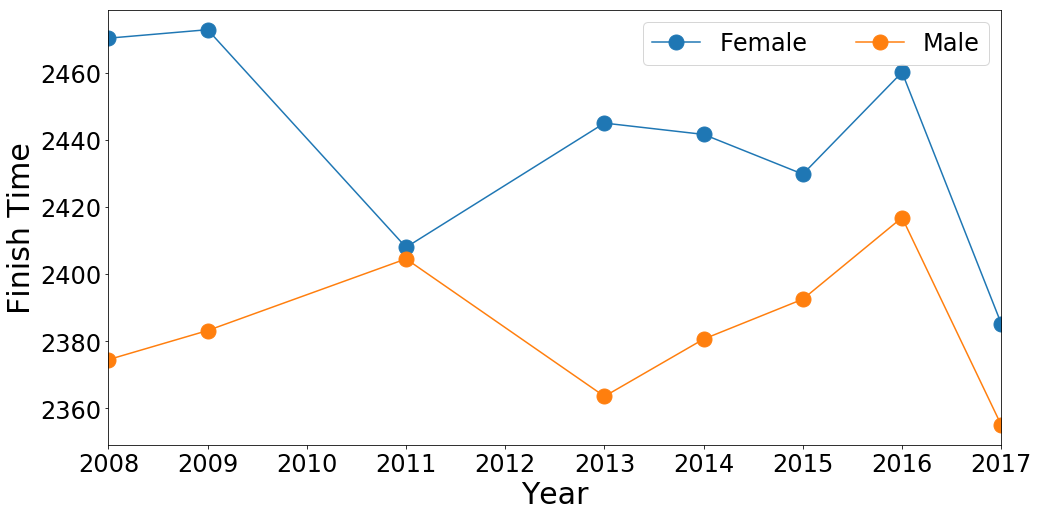

In [406]:
gen = df.groupby(['Year', 'gender'])['time'].mean().unstack()
ax = gen.plot(figsize=(16, 8), fontsize=24, marker='o', ms=15)
ax.set_ylabel('Finish Time', fontsize = 30)
ax.set_xlabel('Year', fontsize = 30)
ax.legend(['Female', 'Male'], frameon=True, ncol=2, loc='upper right', fontsize=24)

2017 was the fastest renewal of the race. Both males and females averaged under 2400 minutes,
which is just under 40 hours. However, 2016 was a slow race in comparison. Again, as we
investigated before this could be due to the route, or number of participants. However, as I have
already mentioned, 2015 and 2016 had the exact same route, and very similar numbers in terms
of participants. The answer lies elsewhere. In 2011, the gap between males and females in terms
of finish time is very small. In fact, if the study by Hoffman is accurate, females would have
outperformed males for this renewal of the UTMB as on average they are 20% slower than males.
Of course, the number of participants who are women is far smaller than that of men, so there is
a greater chance of elite female athletes competing against non-elite male athletes. As mentioned
in the participation section, and as can be seen in Figure 3.11, the percentage of female athletes
who are part of a club is 75%, which is far greater than that of males. Judging by this, the fact
that females are performing well in this rate is unsurprising. The average time for males gets slower yearly, from 2013 to 2016. 2016 is also outstanding as it is far slower than other years.
It follows nearly the same trend to the finish time above. 

In [407]:
df.groupby(['Year', 'category'])['time'].mean().unstack()

category,Masters Men 1 (40-49),Masters Men 2 (50-59),Masters Men 3 (60-69),Masters Men 4 (70-79),Masters Women 1 (40-49),Masters Women 2 (50-59),Masters Women 3 (60-69),Senior Men (23-39),Senior Women (23-39),Youth Men (20-22),Youth Women (20-22)
Year,,,,,,,,,,,
2008,2375.945584,2475.349593,2510.950000,2334.916667,2545.452083,2557.621667,NaN,2317.089749,2345.325806,2196.156667,NaN
2009,2384.472241,2461.627778,2569.250667,2047.483333,2530.455128,2543.125490,2612.291667,2337.544000,2386.435271,1963.275000,NaN
2011,2413.266221,2485.270930,2523.880159,NaN,2461.235802,2536.530556,2682.766667,2343.098498,2306.334375,2618.583333,NaN
2013,2375.028207,2479.920012,2533.032843,NaN,2505.755357,2523.851786,2359.733333,2280.732244,2344.678182,2151.154167,NaN
2014,2391.395531,2465.775000,2545.571528,2719.416667,2497.338679,2565.893137,2706.766667,2319.183180,2317.784884,2376.895833,NaN
2015,2422.101669,2497.502410,2523.005303,2784.566667,2443.219312,2608.069697,2659.633333,2304.243834,2366.305152,1777.841667,NaN
2016,2438.921744,2533.039479,2535.446296,NaN,2444.892529,2591.205556,NaN,2348.457244,2433.463939,2370.166667,NaN
2017,2389.303685,2479.274326,2481.633333,NaN,2442.425956,2562.732500,NaN,2262.208636,2278.653788,1881.938889,NaN


#  Correlation with finish time

One method to examine pivotal stages in the race was to analyse what the highest correlation
was between a stage and the finish time of the runner. The heat map can be seen below. There are several stages that have a high correlation with the finish times

In [408]:
df1 = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Year', 'bib', 'rank', 'name_mask', 'team', 'gender', 'category', 'nationality'], axis=1)

In [409]:
df1.head()

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,...,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
0,5.281863,NaN,NaN,4.375000,NaN,5.443366,6.483539,9.900000,4.980392,8.205502,...,NaN,NaN,7.788288,NaN,NaN,9.016667,5.236486,1141.900000,NaN,7.012357
1,5.147059,NaN,NaN,4.519737,NaN,5.501618,6.510288,10.100000,4.970588,8.098706,...,NaN,NaN,7.869369,NaN,NaN,9.300000,5.072072,1156.983333,15.083333,7.097568
2,5.544118,NaN,NaN,4.372807,NaN,5.500000,6.981481,10.769697,5.689542,8.812298,...,NaN,NaN,7.918919,NaN,NaN,9.804762,4.772523,1193.000000,51.100000,7.352225
3,5.283088,NaN,NaN,4.379386,NaN,5.441748,6.489712,11.700000,5.741830,9.105178,...,NaN,NaN,7.585586,NaN,NaN,9.238095,4.808559,1203.650000,61.750000,7.466542
4,5.145833,NaN,NaN,4.245614,NaN,5.582524,6.615226,9.887879,4.973856,8.249191,...,NaN,NaN,8.414414,NaN,NaN,10.057143,5.141892,1211.633333,69.733333,7.211069


In [410]:
corr = df1.corr()
corr

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,...,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
Chamonix to Delevret,1.000000,NaN,NaN,0.887890,NaN,0.759183,0.558927,0.719470,0.601163,0.634209,...,0.362725,0.165014,0.245069,0.257755,0.267268,0.316142,0.303457,0.739020,0.722374,0.490057
Chamonix to La Charme,NaN,1.000000,NaN,NaN,0.319231,0.446154,0.449466,0.409676,0.436613,0.451101,...,0.173949,NaN,NaN,0.022245,NaN,NaN,0.084243,0.530060,0.527749,0.438790
Chamonix to St-Gervais,NaN,NaN,1.000000,NaN,NaN,0.853267,0.655345,0.711029,0.545055,0.542850,...,0.333982,NaN,NaN,0.219697,NaN,NaN,0.300835,0.771241,0.769776,0.464828
Delevret to St-Gervais,0.887890,NaN,NaN,1.000000,NaN,0.663767,0.546397,0.659320,0.611698,0.559531,...,0.287727,0.172464,0.200164,0.271530,0.279594,0.304803,0.292638,0.652563,0.659269,0.398027
La Charme to St-Gervais,NaN,0.319231,NaN,NaN,1.000000,0.516367,0.392932,0.368793,0.377505,0.386094,...,0.129831,NaN,NaN,-0.017344,NaN,NaN,0.124192,0.444756,0.444078,0.695761
St-Gervais to Contamines,0.759183,0.446154,0.853267,0.663767,0.516367,1.000000,0.538161,0.596153,0.473739,0.547357,...,0.259710,0.174926,0.229340,0.066914,0.284475,0.340421,0.225428,0.596704,0.583751,0.427826
Contamines to La Balme,0.558927,0.449466,0.655345,0.546397,0.392932,0.538161,1.000000,0.682914,0.508763,0.653857,...,0.250717,0.213917,0.228636,0.114582,0.234806,0.235924,0.161814,0.667004,0.658125,0.577820
La Balme to Bonhomme,0.719470,0.409676,0.711029,0.659320,0.368793,0.596153,0.682914,1.000000,0.739561,0.727668,...,0.324484,0.239295,0.220794,0.109316,0.364583,0.378614,0.261102,0.755460,0.757710,0.583704
Bonhomme to Chapieux,0.601163,0.436613,0.545055,0.611698,0.377505,0.473739,0.508763,0.739561,1.000000,0.565654,...,0.230852,0.209880,0.114288,0.087040,0.314826,0.339318,0.293005,0.599176,0.592646,0.490245
Chapieux to Col Seigne,0.634209,0.451101,0.542850,0.559531,0.386094,0.547357,0.653857,0.727668,0.565654,1.000000,...,0.317637,0.246353,0.247087,0.096779,0.331632,0.332194,0.224050,0.775056,0.784678,0.649211


In [411]:
corr['time'].sort_values(ascending = False).head(10)

time                      1.000000
timediff                  0.985731
AVG_Pace                  0.942923
La Fouly to Champex La    0.842255
Champex La to Giete       0.816062
Bovine to Trient          0.810791
Chapieux to Col Seigne    0.775056
Chamonix to St-Gervais    0.771241
Bertone to Bonatti        0.764298
La Balme to Bonhomme      0.755460
Name: time, dtype: float64

In [412]:
corr['time'].sort_values().head(10)

Tete aux Vents to Flegere    0.235564
Mortigny to Trient           0.245378
Col Seigne to Lac Combal     0.307732
Courmayeur to Courmayeur2    0.418480
Vallorcine to Col Montet     0.424530
La Charme to St-Gervais      0.444756
Vallorcine to Argentiere     0.471025
Flegere to Chamonix          0.484815
La Catogne to Vallorcine     0.510306
Chamonix to La Charme        0.530060
Name: time, dtype: float64

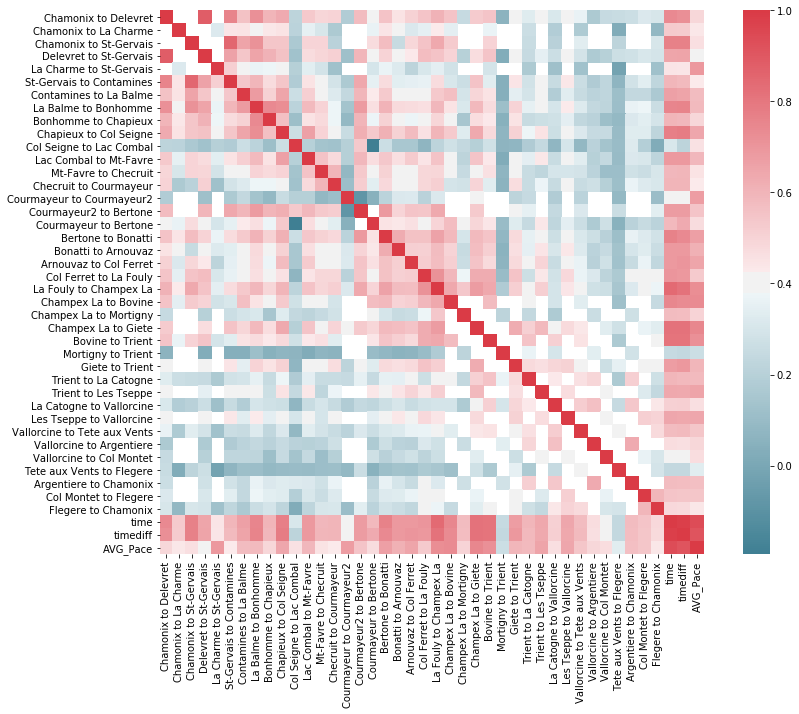

In [413]:
f, ax = plt.subplots(figsize=(14, 10))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

It seems that La Fouly to Champex La is the most important stage, while Champex La to Giete
is the second most important. In the above correlation, between stages, this was the point in the
race where the strong correlation of the first half ended. It also had very high drop out numbers, as seen below. Champex La is not strongly correlated to any other stages. Despite its
uniqueness, it has the highest correlation to a runners finish time. This would make it the Make or Break stage in the race. Indeed, reaching Champex La signifies a massive change in the race.
How runners handle this sudden change is extremely significant in their overall finish time. UTMB
runners should prepare adequately for Champex La when designing their strategy.


# Overall drop out rates

I want to identify the stages with the highest drop out rates for each year. 

In [414]:
full = len(df.time)
finisher = df.time.count()
drop = full - finisher
print('Starters:', full)
print('Finishers:', finisher)
print('Drop outs:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Starters: 19579
Finishers: 11838
Drop outs: 11838
Percentage to finish:  60.4627406916
Percentage to drop out 39.5372593084


# Drop out numbers 2017

In [415]:
df2017 = df.loc[df['Year'] == 2017]

In [416]:
full = len(df2017.time)
finisher = df2017.time.count()
drop = full - finisher
print('Starters:', full)
print('Finishers:', finisher)
print('Drop outs:', drop)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Starters: 2535
Finishers: 1687
Drop outs: 848
Percentage to finish:  66.5483234714
Percentage to drop out 33.4516765286


In [417]:
df2017 = df2017.dropna(axis=1, how='all')

In [418]:
df2017.count()

Unnamed: 0                  2535
Unnamed: 0.1                2532
Year                        2535
bib                         2533
name_mask                   2535
team                        1786
gender                      2535
category                    2535
rank                        2535
nationality                 2535
Chamonix to Delevret        2526
Delevret to St-Gervais      2524
St-Gervais to Contamines    2502
Contamines to La Balme      2439
La Balme to Bonhomme        2418
Bonhomme to Chapieux        2425
Chapieux to Col Seigne      2356
Col Seigne to Lac Combal    2366
Lac Combal to Mt-Favre      2287
Mt-Favre to Checruit        2299
Checruit to Courmayeur      2287
Courmayeur to Bertone       2170
Bertone to Bonatti          2159
Bonatti to Arnouvaz         2155
Arnouvaz to Col Ferret      1961
Col Ferret to La Fouly      1959
La Fouly to Champex La      1798
Champex La to Giete         1729
Giete to Trient             1732
Trient to Les Tseppe        1702
Les Tseppe

In [419]:
stage17 = df2017.filter(like = 'to')

In [420]:
stage17.count()

Chamonix to Delevret        2526
Delevret to St-Gervais      2524
St-Gervais to Contamines    2502
Contamines to La Balme      2439
La Balme to Bonhomme        2418
Bonhomme to Chapieux        2425
Chapieux to Col Seigne      2356
Col Seigne to Lac Combal    2366
Lac Combal to Mt-Favre      2287
Mt-Favre to Checruit        2299
Checruit to Courmayeur      2287
Courmayeur to Bertone       2170
Bertone to Bonatti          2159
Bonatti to Arnouvaz         2155
Arnouvaz to Col Ferret      1961
Col Ferret to La Fouly      1959
La Fouly to Champex La      1798
Champex La to Giete         1729
Giete to Trient             1732
Trient to Les Tseppe        1702
Les Tseppe to Vallorcine    1702
Vallorcine to Col Montet    1690
Col Montet to Flegere       1690
Flegere to Chamonix         1687
dtype: int64

In [421]:
stage17count = stage17.count()

In [422]:
stage17count.diff()

Chamonix to Delevret          NaN
Delevret to St-Gervais       -2.0
St-Gervais to Contamines    -22.0
Contamines to La Balme      -63.0
La Balme to Bonhomme        -21.0
Bonhomme to Chapieux          7.0
Chapieux to Col Seigne      -69.0
Col Seigne to Lac Combal     10.0
Lac Combal to Mt-Favre      -79.0
Mt-Favre to Checruit         12.0
Checruit to Courmayeur      -12.0
Courmayeur to Bertone      -117.0
Bertone to Bonatti          -11.0
Bonatti to Arnouvaz          -4.0
Arnouvaz to Col Ferret     -194.0
Col Ferret to La Fouly       -2.0
La Fouly to Champex La     -161.0
Champex La to Giete         -69.0
Giete to Trient               3.0
Trient to Les Tseppe        -30.0
Les Tseppe to Vallorcine      0.0
Vallorcine to Col Montet    -12.0
Col Montet to Flegere         0.0
Flegere to Chamonix          -3.0
dtype: float64

In [423]:
s17 = stage17count.diff()
s17.sort_values()

Arnouvaz to Col Ferret     -194.0
La Fouly to Champex La     -161.0
Courmayeur to Bertone      -117.0
Lac Combal to Mt-Favre      -79.0
Chapieux to Col Seigne      -69.0
Champex La to Giete         -69.0
Contamines to La Balme      -63.0
Trient to Les Tseppe        -30.0
St-Gervais to Contamines    -22.0
La Balme to Bonhomme        -21.0
Vallorcine to Col Montet    -12.0
Checruit to Courmayeur      -12.0
Bertone to Bonatti          -11.0
Bonatti to Arnouvaz          -4.0
Flegere to Chamonix          -3.0
Col Ferret to La Fouly       -2.0
Delevret to St-Gervais       -2.0
Col Montet to Flegere         0.0
Les Tseppe to Vallorcine      0.0
Giete to Trient               3.0
Bonhomme to Chapieux          7.0
Col Seigne to Lac Combal     10.0
Mt-Favre to Checruit         12.0
Chamonix to Delevret          NaN
dtype: float64

In [424]:
d17 = s17.sort_values()

#  2016 Drop out numbers

In [425]:
df2016 = df.loc[df['Year'] == 2016]

In [426]:
full = len(df2016.time)
finisher = df2016.time.count()
drop = full-finisher
print('Drop outs:', drop)
print('Starters:', full)
print('Finishers:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Drop outs: 1086
Starters: 2554
Finishers: 1468
Percentage to finish:  57.4784651527
Percentage to drop out 42.5215348473


In [427]:
df2016 = df2016.dropna(axis=1, how='all')
stage16 = df2016.filter(like = 'to')
stage16count = stage16.count()
s16 = stage16count.diff()
s16.count

<bound method Series.count of Chamonix to Delevret              NaN
Delevret to St-Gervais           -1.0
St-Gervais to Contamines        -45.0
Contamines to La Balme         -113.0
La Balme to Bonhomme            -21.0
Bonhomme to Chapieux             -7.0
Chapieux to Col Seigne          -91.0
Col Seigne to Lac Combal        -23.0
Lac Combal to Mt-Favre          -75.0
Mt-Favre to Checruit              8.0
Checruit to Courmayeur          -41.0
Courmayeur to Courmayeur2       -99.0
Courmayeur to Bertone          -106.0
Bertone to Bonatti              -20.0
Bonatti to Arnouvaz             -10.0
Arnouvaz to Col Ferret         -152.0
Col Ferret to La Fouly           -2.0
La Fouly to Champex La         -141.0
Champex La to Giete             -96.0
Giete to Trient                  -3.0
Trient to La Catogne            -36.0
La Catogne to Vallorcine         -4.0
Vallorcine to Tete aux Vents     -6.0
Tete aux Vents to Flegere        -3.0
Flegere to Chamonix               1.0
dtype: float64>

In [428]:
s16.sort_values()

Arnouvaz to Col Ferret         -152.0
La Fouly to Champex La         -141.0
Contamines to La Balme         -113.0
Courmayeur to Bertone          -106.0
Courmayeur to Courmayeur2       -99.0
Champex La to Giete             -96.0
Chapieux to Col Seigne          -91.0
Lac Combal to Mt-Favre          -75.0
St-Gervais to Contamines        -45.0
Checruit to Courmayeur          -41.0
Trient to La Catogne            -36.0
Col Seigne to Lac Combal        -23.0
La Balme to Bonhomme            -21.0
Bertone to Bonatti              -20.0
Bonatti to Arnouvaz             -10.0
Bonhomme to Chapieux             -7.0
Vallorcine to Tete aux Vents     -6.0
La Catogne to Vallorcine         -4.0
Tete aux Vents to Flegere        -3.0
Giete to Trient                  -3.0
Col Ferret to La Fouly           -2.0
Delevret to St-Gervais           -1.0
Flegere to Chamonix               1.0
Mt-Favre to Checruit              8.0
Chamonix to Delevret              NaN
dtype: float64

In [429]:
d16 = s16.sort_values()

#  2015 drop out numbers

In [430]:
df2015 = df.loc[df['Year'] == 2015]

In [431]:
full = len(df2015.time)
finisher = df2015.time.count()
drop = full - finisher
print('Drop outs:', drop)
print('Starters:', full)
print('Finishers:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Drop outs: 930
Starters: 2561
Finishers: 1631
Percentage to finish:  63.6860601328
Percentage to drop out 36.3139398672


In [432]:
df2015 = df2015.dropna(axis=1, how='all')
stage15 = df2015.filter(like = 'to')
stage15count = stage15.count()
s15 = stage15count.diff()
s15.count

<bound method Series.count of Chamonix to Delevret              NaN
Delevret to St-Gervais           -5.0
St-Gervais to Contamines        -32.0
Contamines to La Balme         -127.0
La Balme to Bonhomme            -10.0
Bonhomme to Chapieux             -1.0
Chapieux to Col Seigne          -83.0
Col Seigne to Lac Combal         -1.0
Lac Combal to Mt-Favre         -121.0
Mt-Favre to Checruit             -1.0
Checruit to Courmayeur            6.0
Courmayeur to Courmayeur2       -77.0
Courmayeur2 to Bertone         -115.0
Bertone to Bonatti              -17.0
Bonatti to Arnouvaz             -16.0
Arnouvaz to Col Ferret          -97.0
Col Ferret to La Fouly          -17.0
La Fouly to Champex La         -102.0
Champex La to Giete             -58.0
Giete to Trient                  -2.0
Trient to La Catogne            -17.0
La Catogne to Vallorcine          0.0
Vallorcine to Tete aux Vents    -28.0
Tete aux Vents to Flegere        -3.0
Flegere to Chamonix              -5.0
dtype: float64>

In [433]:
s15.sort_values()

Contamines to La Balme         -127.0
Lac Combal to Mt-Favre         -121.0
Courmayeur2 to Bertone         -115.0
La Fouly to Champex La         -102.0
Arnouvaz to Col Ferret          -97.0
Chapieux to Col Seigne          -83.0
Courmayeur to Courmayeur2       -77.0
Champex La to Giete             -58.0
St-Gervais to Contamines        -32.0
Vallorcine to Tete aux Vents    -28.0
Trient to La Catogne            -17.0
Col Ferret to La Fouly          -17.0
Bertone to Bonatti              -17.0
Bonatti to Arnouvaz             -16.0
La Balme to Bonhomme            -10.0
Delevret to St-Gervais           -5.0
Flegere to Chamonix              -5.0
Tete aux Vents to Flegere        -3.0
Giete to Trient                  -2.0
Mt-Favre to Checruit             -1.0
Col Seigne to Lac Combal         -1.0
Bonhomme to Chapieux             -1.0
La Catogne to Vallorcine          0.0
Checruit to Courmayeur            6.0
Chamonix to Delevret              NaN
dtype: float64

In [434]:
d15 = s15.sort_values()

# 2014 drop out

In [435]:
df2014 = df.loc[df['Year'] == 2014]

In [436]:
full = len(df2014.time)
finisher = df2014.time.count()
drop = full - finisher
print('Drop outs:', drop)
print('Starters:', full)
print('Finishers:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Drop outs: 849
Starters: 2431
Finishers: 1582
Percentage to finish:  65.0761003702
Percentage to drop out 34.9238996298


In [437]:
df2014 = df2014.dropna(axis=1, how='all')
stage14 = df2014.filter(like = 'to')
stage14count = stage14.count()
s14 = stage14count.diff()
s14.count

<bound method Series.count of Chamonix to Delevret              NaN
Delevret to St-Gervais            4.0
St-Gervais to Contamines        -88.0
Contamines to La Balme          -44.0
La Balme to Bonhomme            -16.0
Bonhomme to Chapieux            -11.0
Chapieux to Col Seigne         -108.0
Col Seigne to Lac Combal          3.0
Lac Combal to Mt-Favre          -61.0
Mt-Favre to Checruit             -2.0
Checruit to Courmayeur           -5.0
Courmayeur to Bertone          -140.0
Bertone to Bonatti              -48.0
Bonatti to Arnouvaz              16.0
Arnouvaz to Col Ferret          -92.0
Col Ferret to La Fouly          -20.0
La Fouly to Champex La          -87.0
Champex La to Giete             -62.0
Giete to Trient                  -8.0
Trient to La Catogne            -40.0
La Catogne to Vallorcine         -3.0
Vallorcine to Tete aux Vents    -13.0
Tete aux Vents to Flegere        -6.0
Flegere to Chamonix               0.0
dtype: float64>

In [438]:
s14.sort_values().head()

Courmayeur to Bertone      -140.0
Chapieux to Col Seigne     -108.0
Arnouvaz to Col Ferret      -92.0
St-Gervais to Contamines    -88.0
La Fouly to Champex La      -87.0
dtype: float64

In [439]:
d14 = s14.sort_values()

#  2013 drop out

In [440]:
df2013 = df.loc[df['Year'] == 2013]

In [441]:
full = len(df2013.time)
finisher = df2013.time.count()
drop = full - finisher
print('Drop outs:', drop)
print('Starters:', full)
print('Finishers:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Drop outs: 782
Starters: 2468
Finishers: 1686
Percentage to finish:  68.3144246353
Percentage to drop out 31.6855753647


In [442]:

df2013 = df2013.dropna(axis=1, how='all')
stage13 = df2013.filter(like = 'to')
stage13count = stage13.count()
s13 = stage13count.diff()
s13.count

<bound method Series.count of Chamonix to Delevret              NaN
Delevret to St-Gervais           -2.0
St-Gervais to Contamines        -28.0
Contamines to La Balme          -95.0
La Balme to Bonhomme            -24.0
Bonhomme to Chapieux             -1.0
Chapieux to Col Seigne          -78.0
Col Seigne to Lac Combal         -5.0
Lac Combal to Mt-Favre          -57.0
Mt-Favre to Checruit             -7.0
Checruit to Courmayeur           -2.0
Courmayeur to Bertone          -147.0
Bertone to Bonatti              -31.0
Bonatti to Arnouvaz              18.0
Arnouvaz to Col Ferret         -102.0
Col Ferret to La Fouly           -6.0
La Fouly to Champex La          -85.0
Champex La to Bovine            -64.0
Bovine to Trient                -20.0
Trient to La Catogne            -33.0
La Catogne to Vallorcine          9.0
Vallorcine to Tete aux Vents    -19.0
Tete aux Vents to Flegere         0.0
Flegere to Chamonix              -2.0
dtype: float64>

In [443]:
s13.sort_values().head()

Courmayeur to Bertone    -147.0
Arnouvaz to Col Ferret   -102.0
Contamines to La Balme    -95.0
La Fouly to Champex La    -85.0
Chapieux to Col Seigne    -78.0
dtype: float64

In [444]:
d13 = s13.sort_values()

#  2011 drop out

In [445]:
df2011 = df.loc[df['Year'] == 2011]

In [446]:
full = len(df2011.time)
finisher = df2011.time.count()
drop = full - finisher
print('Drop outs:', drop)
print('Starters:', full)
print('Finishers:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Drop outs: 1235
Starters: 2368
Finishers: 1133
Percentage to finish:  47.8462837838
Percentage to drop out 52.1537162162


Obviously a very tough year for the race. This is the only year where more people dropped out than finished. 

In [447]:
df2011 = df2011.dropna(axis=1, how='all')
stage11 = df2011.filter(like = 'to')
stage11count = stage11.count()
s11 = stage11count.diff()
s11.count

<bound method Series.count of Chamonix to Delevret          NaN
Delevret to St-Gervais       -4.0
St-Gervais to Contamines    -41.0
Contamines to La Balme     -113.0
La Balme to Bonhomme         -5.0
Bonhomme to Chapieux          2.0
Chapieux to Col Seigne      -67.0
Col Seigne to Lac Combal    -23.0
Lac Combal to Mt-Favre      -65.0
Mt-Favre to Checruit         20.0
Checruit to Courmayeur      -16.0
Courmayeur to Bertone      -235.0
Bertone to Bonatti          -23.0
Bonatti to Arnouvaz          -9.0
Arnouvaz to Col Ferret     -205.0
Col Ferret to La Fouly       -3.0
La Fouly to Champex La     -280.0
Champex La to Mortigny     -100.0
Mortigny to Trient          -18.0
Trient to La Catogne        -18.0
La Catogne to Vallorcine     -3.0
Vallorcine to Argentiere    -14.0
Argentiere to Chamonix       -3.0
dtype: float64>

In [448]:
s11.sort_values().head()

La Fouly to Champex La   -280.0
Courmayeur to Bertone    -235.0
Arnouvaz to Col Ferret   -205.0
Contamines to La Balme   -113.0
Champex La to Mortigny   -100.0
dtype: float64

In [449]:
d11 = s11.sort_values()

#  2009 drop out

In [450]:
df2009 = df.loc[df['Year'] == 2009]

In [451]:
df2009 = df2009.dropna(axis=1, how='all')
stage09 = df2009.filter(like = 'to')
stage09count = stage09.count()
s09 = stage09count.diff()
s09.count

<bound method Series.count of Chamonix to St-Gervais            NaN
St-Gervais to Contamines        -43.0
Contamines to La Balme         -106.0
La Balme to Bonhomme            -39.0
Bonhomme to Chapieux             21.0
Chapieux to Col Seigne         -106.0
Col Seigne to Lac Combal         -7.0
Lac Combal to Mt-Favre          -32.0
Mt-Favre to Checruit             -2.0
Checruit to Courmayeur           43.0
Courmayeur to Bertone          -236.0
Bertone to Bonatti              -11.0
Bonatti to Arnouvaz             -32.0
Arnouvaz to Col Ferret          -72.0
Col Ferret to La Fouly           -3.0
La Fouly to Champex La         -119.0
Champex La to Bovine            -91.0
Bovine to Trient                  3.0
Trient to La Catogne            -35.0
La Catogne to Vallorcine         -3.0
Vallorcine to Tete aux Vents    -28.0
Tete aux Vents to Flegere         2.0
Flegere to Chamonix              -2.0
dtype: float64>

In [452]:
full = len(df2009.time)
finisher = df2009.time.count()
drop = full - finisher
print('Drop outs:', drop)
print('Starters:', full)
print('Finishers:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Drop outs: 903
Starters: 2286
Finishers: 1383
Percentage to finish:  60.498687664
Percentage to drop out 39.501312336


In [453]:
s09.sort_values().head()

Courmayeur to Bertone    -236.0
La Fouly to Champex La   -119.0
Contamines to La Balme   -106.0
Chapieux to Col Seigne   -106.0
Champex La to Bovine      -91.0
dtype: float64

In [454]:
d9 = s09.sort_values()

# 2008 drop out 

In [455]:
df2008 = df.loc[df['Year'] == 2008]

In [456]:
full = len(df2008.time)
finisher = df2008.time.count()
drop = full - finisher
print('Drop outs:', drop)
print('Starters:', full)
print('Finishers:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Drop outs: 1108
Starters: 2376
Finishers: 1268
Percentage to finish:  53.367003367
Percentage to drop out 46.632996633


In [457]:

df2008 = df2008.dropna(axis=1, how='all')
stage08 = df2008.filter(like = 'to')
stage08count = stage08.count()
s08 = stage08count.diff()
s08.count

<bound method Series.count of Chamonix to La Charme             NaN
La Charme to St-Gervais         667.0
St-Gervais to Contamines        264.0
Contamines to La Balme         -141.0
La Balme to Bonhomme             -7.0
Bonhomme to Chapieux             12.0
Chapieux to Col Seigne         -132.0
Col Seigne to Lac Combal        -12.0
Lac Combal to Mt-Favre          -47.0
Mt-Favre to Checruit           -174.0
Checruit to Courmayeur          143.0
Courmayeur to Bertone          -242.0
Bertone to Bonatti              -23.0
Bonatti to Arnouvaz             -87.0
Arnouvaz to Col Ferret          -63.0
Col Ferret to La Fouly            2.0
La Fouly to Champex La         -140.0
Champex La to Bovine           -142.0
Bovine to Trient                 -3.0
Trient to La Catogne            -35.0
La Catogne to Vallorcine         11.0
Vallorcine to Tete aux Vents    -13.0
Tete aux Vents to Flegere         4.0
Flegere to Chamonix               3.0
dtype: float64>

In [458]:
s08.sort_values().head()

Courmayeur to Bertone    -242.0
Mt-Favre to Checruit     -174.0
Champex La to Bovine     -142.0
Contamines to La Balme   -141.0
La Fouly to Champex La   -140.0
dtype: float64

In [459]:
d8 = s08
d9 = s09
d11 = s11
d13 = s13
d14 = s14
d15 = s15
d16 = s16
d17 = s17

In [460]:
d9.head()

Chamonix to St-Gervais        NaN
St-Gervais to Contamines    -43.0
Contamines to La Balme     -106.0
La Balme to Bonhomme        -39.0
Bonhomme to Chapieux         21.0
dtype: float64

In [461]:
d_all = d17.append([d16, d15, d14, d13, d11, d9, d8])


In [462]:
d_all.sort_values()

La Fouly to Champex La      -280.0
Courmayeur to Bertone       -242.0
Courmayeur to Bertone       -236.0
Courmayeur to Bertone       -235.0
Arnouvaz to Col Ferret      -205.0
Arnouvaz to Col Ferret      -194.0
Mt-Favre to Checruit        -174.0
La Fouly to Champex La      -161.0
Arnouvaz to Col Ferret      -152.0
Courmayeur to Bertone       -147.0
Champex La to Bovine        -142.0
La Fouly to Champex La      -141.0
Contamines to La Balme      -141.0
Courmayeur to Bertone       -140.0
La Fouly to Champex La      -140.0
Chapieux to Col Seigne      -132.0
Contamines to La Balme      -127.0
Lac Combal to Mt-Favre      -121.0
La Fouly to Champex La      -119.0
Courmayeur to Bertone       -117.0
Courmayeur2 to Bertone      -115.0
Contamines to La Balme      -113.0
Contamines to La Balme      -113.0
Chapieux to Col Seigne      -108.0
Contamines to La Balme      -106.0
Chapieux to Col Seigne      -106.0
Courmayeur to Bertone       -106.0
La Fouly to Champex La      -102.0
Arnouvaz to Col Ferr

These are the results for the highest drop-out rates:
There are a few reoccurring stages with high drop-out rates. These are Arnouvaz to Col Ferret,
Courmayeur to Bertone, and La Fouly to Champex La. It seems that these are consistently tough stages each year

# Completion Rate

We examine the yearly completion rate:

In [463]:
d = {'Year': [2008, 2009, 2011, 2013, 2014, 2015, 2016, 2017], 'Finishers': [1268, 1383, 1133, 1686, 1582, 1631, 1468, 1687],
    'Non-Finishers': [1108, 903, 1235, 782, 849, 930, 1086, 848]}
comp = pd.DataFrame(data=d)
comp = comp.set_index('Year')
comp

,Finishers,Non-Finishers
Year,,
2008,1268,1108
2009,1383,903
2011,1133,1235
2013,1686,782
2014,1582,849
2015,1631,930
2016,1468,1086
2017,1687,848


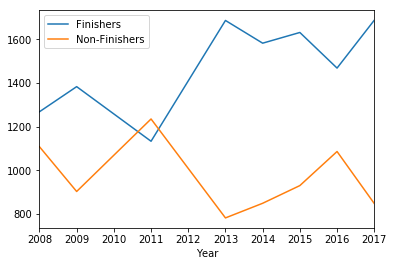

In [464]:
comp.plot()

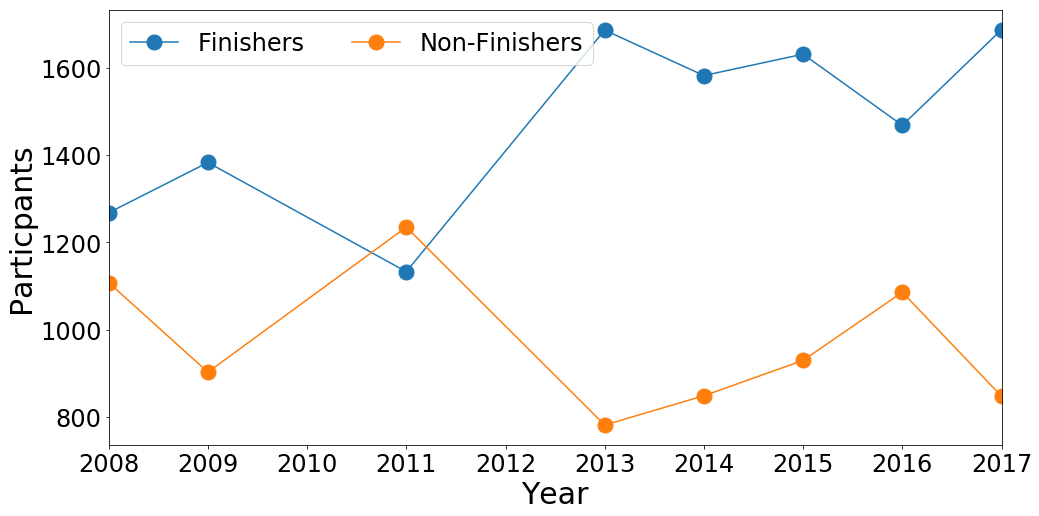

In [465]:

ax = comp.plot(figsize=(16, 8), fontsize=24, marker='o', ms=15)
ax.set_ylabel('Particpants', fontsize = 30)
ax.set_xlabel('Year', fontsize = 30)
ax.legend(['Finishers', 'Non-Finishers'], frameon=True, ncol=2, loc='upper left', fontsize=24)

Overall, the drop out rate is decreasing. 2013 and 2017 have very low drop-out rates in comparison
to other years. Over 1000 runners dropped out in 2016. This is surprising as the average pace
for 2016 was slower than other years. The drop-out rate is also considerably higher than that of
2015, despite following the same route. When splitting the data in terms of gender we see just
how hard women found 2016. Nearly half of female participants dropped out. In 2008 and 2011,
more females dropped out than finished the race. These results reflect the results for males, as
they also had a very high drop out rate in these years. However, due to the small numbers, the
percentage rates are much different. Therefore, for a year like 2011, where 1061 out of 2182
males finished the race (49%), and where 72 out of 186 females finished the race (39%), the
ratios show that females found the race considerably tougher on average. 

In [466]:
comp.index

Int64Index([2008, 2009, 2011, 2013, 2014, 2015, 2016, 2017], dtype='int64', name='Year')

# Starts

I wanted to investigate the effect of start paces on overall finish time. I first found the start stages

Need to examine the start stages

In [467]:
df2017.iloc[0, 10:15]

Chamonix to Delevret        5.28186
Delevret to St-Gervais        4.375
St-Gervais to Contamines    5.44337
Contamines to La Balme      6.48354
La Balme to Bonhomme            9.9
Name: 0, dtype: object

In [468]:
df2016.iloc[0, 10:15]

Chamonix to Delevret        5.61765
Delevret to St-Gervais      4.39912
St-Gervais to Contamines    6.23625
Contamines to La Balme      9.40329
La Balme to Bonhomme        14.5576
Name: 2535, dtype: object

In [469]:
df2015.iloc[0, 10:15]

Chamonix to Delevret        5.49755
Delevret to St-Gervais      4.52193
St-Gervais to Contamines    5.67476
Contamines to La Balme      7.04527
La Balme to Bonhomme        10.8152
Name: 5089, dtype: object

In [470]:
df2014.iloc[0, 10:15]

Chamonix to Delevret        5.39828
Delevret to St-Gervais      4.45395
St-Gervais to Contamines    5.65372
Contamines to La Balme      6.84774
La Balme to Bonhomme        10.8303
Name: 7650, dtype: object

In [471]:
df2013.iloc[0, 10:15]

Chamonix to Delevret        5.78309
Delevret to St-Gervais       4.5307
St-Gervais to Contamines    5.94013
Contamines to La Balme      6.69547
La Balme to Bonhomme        10.9939
Name: 10081, dtype: object

In [472]:
df2011.iloc[0, 10:15]

Chamonix to Delevret        5.68627
Delevret to St-Gervais       4.9057
St-Gervais to Contamines    5.62783
Contamines to La Balme       6.9321
La Balme to Bonhomme        10.4455
Name: 12549, dtype: object

In [473]:
df2009.iloc[0, 10:15]

Chamonix to St-Gervais       5.3124
St-Gervais to Contamines    5.66343
Contamines to La Balme      6.40123
La Balme to Bonhomme        9.84545
Bonhomme to Chapieux        6.10784
Name: 14917, dtype: object

In [474]:
df2008.iloc[0, 10:15]

Chamonix to La Charme       3.35435
La Charme to St-Gervais     5.27222
St-Gervais to Contamines    5.55016
Contamines to La Balme      7.25309
La Balme to Bonhomme        10.2848
Name: 17203, dtype: object

We'll focus on the starts from the years 2011 to 2017, as they have the exact same starting stages and are easy to compare.

In [475]:
df = df.drop(df[(df.Year == 2008)].index)

In [476]:
df = df.drop(df[(df.Year == 2009)].index)

In [477]:
gender = df['gender']

In [478]:
team = df['team']

In [479]:
df = df[['Chamonix to Delevret', 'Delevret to St-Gervais', 'St-Gervais to Contamines', 'Contamines to La Balme', 
         'La Balme to Bonhomme', 'AVG_Pace','time', 'rank'
        ]]

In [480]:
df.head()

,Chamonix to Delevret,Delevret to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,AVG_Pace,time,rank
0,5.281863,4.375000,5.443366,6.483539,9.900000,7.012357,1141.900000,1.0
1,5.147059,4.519737,5.501618,6.510288,10.100000,7.097568,1156.983333,2.0
2,5.544118,4.372807,5.500000,6.981481,10.769697,7.352225,1193.000000,3.0
3,5.283088,4.379386,5.441748,6.489712,11.700000,7.466542,1203.650000,4.0
4,5.145833,4.245614,5.582524,6.615226,9.887879,7.211069,1211.633333,5.0


In [481]:
df = df.dropna(axis=0, how='any')

In [482]:
times = df.filter(like='time')
avg = df.filter(like='AVG')
rank = df.filter(like='rank')

In [483]:
df = df.loc[:, 'Chamonix to Delevret':'La Balme to Bonhomme'].div(df['AVG_Pace'], axis=0)

In [484]:
df = df.join(avg)

In [485]:
df = df.join(times)

In [486]:
df['Start_Pace'] = df.filter(like='to').mean(axis = 1)

In [487]:
df['Start_Pace'].sort_values().head()

6506    0.427713
3515    0.498450
6272    0.505118
3419    0.509975
6074    0.511754
Name: Start_Pace, dtype: float64

In [488]:
df['Start_Pace'].sort_values(ascending= False).head()

10292    1.049703
2535     1.013557
12701    1.010342
7920     0.993166
12647    0.980226
Name: Start_Pace, dtype: float64

In [489]:
df['Fast'] = df['Start_Pace'] < (df['AVG_Pace'] * 0.9)

In [490]:
df['Slow'] = df['Start_Pace'] > (df['AVG_Pace'] * 1.1)

In [491]:
df_fast = df.loc[df['Fast'] == True]

In [492]:
df_slow = df.loc[df['Slow'] == True]

# Comparing start pace to average pace

Compares the first five stages with the average pace...

In [493]:
df['rel_AVG_Pace'] = df.loc[:, 'AVG_Pace'].div(df['AVG_Pace'], axis=0)

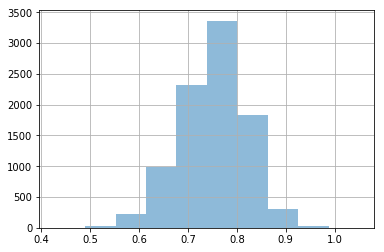

In [494]:
df['Start_Pace'].hist(alpha = 0.5)
#df['rel_AVG_Pace'].hist(alpha = 0.5)

#####  First stage vs average

In [495]:
df2 = df[['Chamonix to Delevret', 'AVG_Pace','time'
        ]]

In [496]:
df2 = df2.dropna(axis=0, how='any')

In [497]:
df2['Start_Pace'] = df2.filter(like='to').mean(axis = 1)

In [498]:
df2['Start_Pace'].sort_values().head()

6506    0.333109
809     0.365683
6272    0.380896
6074    0.384675
6576    0.387235
Name: Start_Pace, dtype: float64

In [499]:
df2['Start_Pace'].sort_values(ascending= False).head()

12657    0.851811
12701    0.850446
12647    0.849006
12592    0.843248
156      0.841125
Name: Start_Pace, dtype: float64

In [500]:
df2.head()

,Chamonix to Delevret,AVG_Pace,time,Start_Pace
0,0.753222,7.012357,1141.900000,0.753222
1,0.725186,7.097568,1156.983333,0.725186
2,0.754073,7.352225,1193.000000,0.754073
3,0.707568,7.466542,1203.650000,0.707568
4,0.713602,7.211069,1211.633333,0.713602


In [501]:
df2['Fast'] = df2['Start_Pace'] < (df2['AVG_Pace'] * 0.9)

In [502]:
df2

,Chamonix to Delevret,AVG_Pace,time,Start_Pace,Fast
0,0.753222,7.012357,1141.900000,0.753222,True
1,0.725186,7.097568,1156.983333,0.725186,True
2,0.754073,7.352225,1193.000000,0.754073,True
3,0.707568,7.466542,1203.650000,0.707568,True
4,0.713602,7.211069,1211.633333,0.713602,True
5,0.717753,7.505718,1212.716667,0.717753,True
6,0.725346,7.531904,1219.800000,0.725346,True
7,0.670439,8.141435,1284.316667,0.670439,True
8,0.634485,8.106394,1288.533333,0.634485,True
9,0.689516,8.047702,1304.516667,0.689516,True


In [503]:
df2['Slow'] = df2['Start_Pace'] > (df2['AVG_Pace'] * 1.1)

#####  First 2 stages vs average

In [504]:
df3 = df[['Chamonix to Delevret', 'Delevret to St-Gervais', 'AVG_Pace','time'
        ]]

In [505]:
df3 = df3.dropna(axis=0, how='any')

In [506]:
df3['Start_Pace'] = df3.filter(like='to').mean(axis = 1)

In [507]:
df3['Start_Pace'].sort_values().head()

6506     0.308773
6074     0.336242
809      0.339526
10904    0.342971
6272     0.346003
Name: Start_Pace, dtype: float64

In [508]:
df3['Start_Pace'].sort_values(ascending= False).head()

12701    0.862060
12673    0.828588
12657    0.820043
12647    0.812058
12671    0.784672
Name: Start_Pace, dtype: float64

In [509]:
df3.head()

,Chamonix to Delevret,Delevret to St-Gervais,AVG_Pace,time,Start_Pace
0,0.753222,0.623899,7.012357,1141.900000,0.688560
1,0.725186,0.636801,7.097568,1156.983333,0.680993
2,0.754073,0.594760,7.352225,1193.000000,0.674417
3,0.707568,0.586535,7.466542,1203.650000,0.647051
4,0.713602,0.588763,7.211069,1211.633333,0.651183


In [510]:
df3['Fast'] = df3['Start_Pace'] < (df3['AVG_Pace'] * 0.9)

In [511]:
df3['Slow'] = df3['Start_Pace'] > (df3['AVG_Pace'] * 1.1)

#####  First 3 stages vs average

In [512]:
df4 = df[['Chamonix to Delevret', 'Delevret to St-Gervais', 'St-Gervais to Contamines', 'AVG_Pace','time'
        ]]

In [513]:
df4 = df4.dropna(axis=0, how='any')

In [514]:
df4['Start_Pace'] = df4.filter(like='to').mean(axis = 1)

In [515]:
df4['Start_Pace'].sort_values().head()

6506    0.328959
6272    0.375951
3419    0.377034
3515    0.378495
6576    0.382040
Name: Start_Pace, dtype: float64

In [516]:
df4['Start_Pace'].sort_values(ascending= False).head()

12701    0.884033
10154    0.874204
10292    0.850693
12647    0.833542
12657    0.823440
Name: Start_Pace, dtype: float64

In [517]:
df4.head()

,Chamonix to Delevret,Delevret to St-Gervais,St-Gervais to Contamines,AVG_Pace,time,Start_Pace
0,0.753222,0.623899,0.776253,7.012357,1141.900000,0.717791
1,0.725186,0.636801,0.775141,7.097568,1156.983333,0.712376
2,0.754073,0.594760,0.748073,7.352225,1193.000000,0.698969
3,0.707568,0.586535,0.728818,7.466542,1203.650000,0.674307
4,0.713602,0.588763,0.774160,7.211069,1211.633333,0.692175


In [518]:
df4['Fast'] = df4['Start_Pace'] < (df4['AVG_Pace'] * 0.9)

In [519]:
df4['Slow'] = df4['Start_Pace'] > (df4['AVG_Pace'] * 1.1)

#####  First 4 stages vs average

In [520]:
df5 = df[['Chamonix to Delevret', 'Delevret to St-Gervais', 'St-Gervais to Contamines','Contamines to La Balme', 'AVG_Pace','time'
        ]]

In [521]:
df5 = df5.dropna(axis=0, how='any')

In [522]:
df5['Start_Pace'] = df5.filter(like='to').mean(axis = 1)

In [523]:
df5['Start_Pace'].sort_values().head()

6506     0.370897
10904    0.427066
1617     0.432766
3515     0.433397
6272     0.434118
Name: Start_Pace, dtype: float64

In [524]:
df5['Start_Pace'].sort_values(ascending= False).head()

12701    0.915904
12591    0.905503
10292    0.904803
12657    0.879139
5369     0.878809
Name: Start_Pace, dtype: float64

In [525]:
df5.head()

,Chamonix to Delevret,Delevret to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,AVG_Pace,time,Start_Pace
0,0.753222,0.623899,0.776253,0.924588,7.012357,1141.900000,0.769490
1,0.725186,0.636801,0.775141,0.917256,7.097568,1156.983333,0.763596
2,0.754073,0.594760,0.748073,0.949574,7.352225,1193.000000,0.761620
3,0.707568,0.586535,0.728818,0.869172,7.466542,1203.650000,0.723023
4,0.713602,0.588763,0.774160,0.917371,7.211069,1211.633333,0.748474


In [526]:
df5['Fast'] = df5['Start_Pace'] < (df5['AVG_Pace'] * 0.9)

In [527]:
df5['Slow'] = df5['Start_Pace'] > (df5['AVG_Pace'] * 1.1)

# Comparing start pace to average pace

Comparing each start pace sections with average pace

<function matplotlib.pyplot.show>

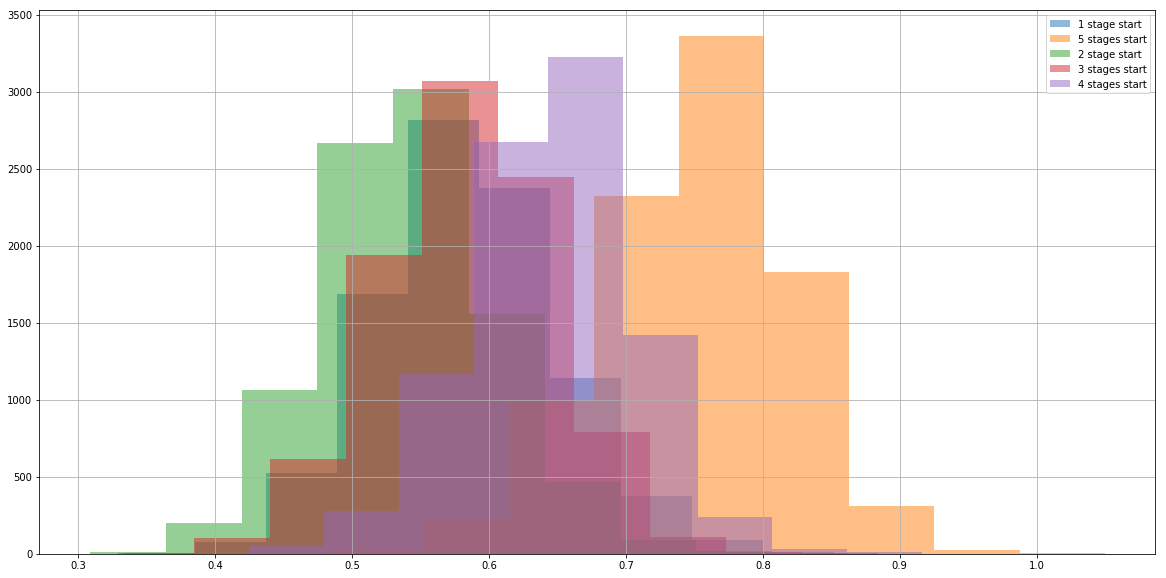

In [528]:
plt.figure(figsize = (20, 10))

df2['Start_Pace'].hist(alpha = 0.5)
df['Start_Pace'].hist(alpha = 0.5)
df3['Start_Pace'].hist(alpha = 0.5)
df4['Start_Pace'].hist(alpha = 0.5)
df5['Start_Pace'].hist(alpha = 0.5)
#df['rel_AVG_Pace'].hist(alpha = 0.5)

plt.legend(['1 stage start', '5 stages start', '2 stage start', '3 stages start', '4 stages start','Average pace' ])
plt.show

In [529]:
df.head()

,Chamonix to Delevret,Delevret to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,AVG_Pace,time,Start_Pace,Fast,Slow,rel_AVG_Pace
0,0.753222,0.623899,0.776253,0.924588,1.411793,7.012357,1141.900000,0.897951,True,False,1.0
1,0.725186,0.636801,0.775141,0.917256,1.423023,7.097568,1156.983333,0.895481,True,False,1.0
2,0.754073,0.594760,0.748073,0.949574,1.464821,7.352225,1193.000000,0.902260,True,False,1.0
3,0.707568,0.586535,0.728818,0.869172,1.566990,7.466542,1203.650000,0.891817,True,False,1.0
4,0.713602,0.588763,0.774160,0.917371,1.371209,7.211069,1211.633333,0.873021,True,False,1.0


Text(0.5,0.98,'Average 1km pace per Category')

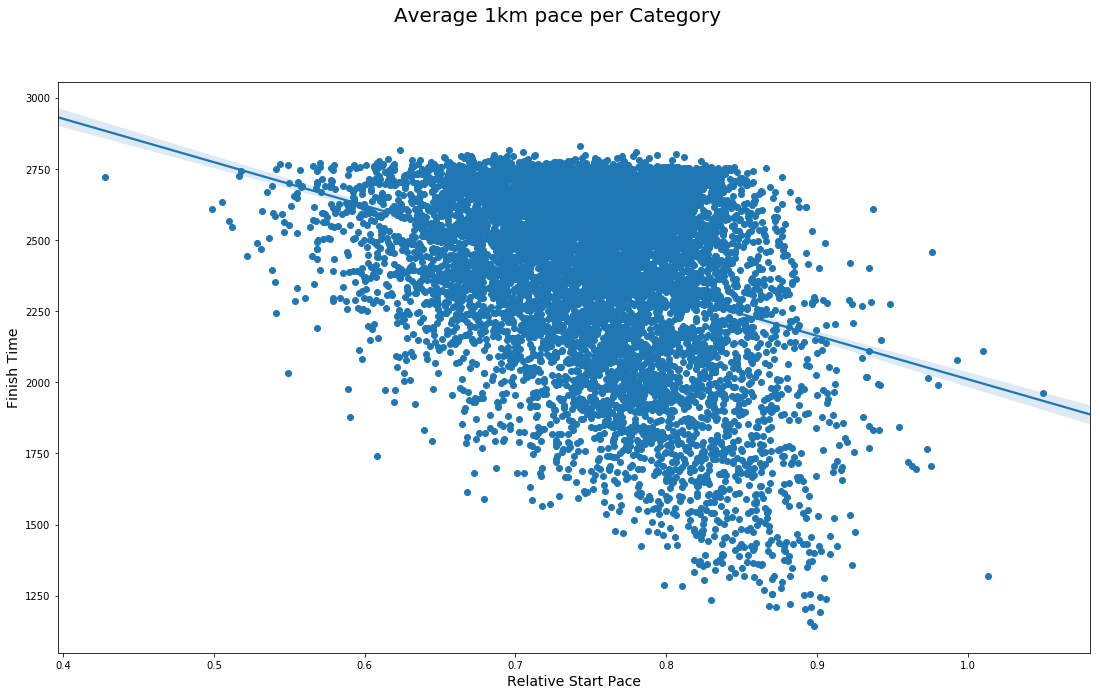

In [530]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot('Start_Pace', 'time', data=df, scatter_kws={'alpha': 1})
ax.set_ylabel('Finish Time', fontsize = 14)
ax.set_xlabel('Relative Start Pace', fontsize = 14)
fig.suptitle('Average 1km pace per Category', fontsize=20)

### Start Pace vs Finish Time (5 Stages)

In [531]:
df = df.join(gender)

In [532]:
df.head()

,Chamonix to Delevret,Delevret to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,AVG_Pace,time,Start_Pace,Fast,Slow,rel_AVG_Pace,gender
0,0.753222,0.623899,0.776253,0.924588,1.411793,7.012357,1141.900000,0.897951,True,False,1.0,Male
1,0.725186,0.636801,0.775141,0.917256,1.423023,7.097568,1156.983333,0.895481,True,False,1.0,Male
2,0.754073,0.594760,0.748073,0.949574,1.464821,7.352225,1193.000000,0.902260,True,False,1.0,Male
3,0.707568,0.586535,0.728818,0.869172,1.566990,7.466542,1203.650000,0.891817,True,False,1.0,Male
4,0.713602,0.588763,0.774160,0.917371,1.371209,7.211069,1211.633333,0.873021,True,False,1.0,Male


In [533]:
male = df.loc[df['gender'] == 'Male']
female = df.loc[df['gender'] == 'Female']

Start pace can be crucial when it comes to finish time. Comparing slow starting paces to fast
starting paces, in terms of finish time, would give me a good indication of the better strategy.
Taking the first five stages at the ’Start’,the average relative pace of these stages was found and
compared to the finish time.


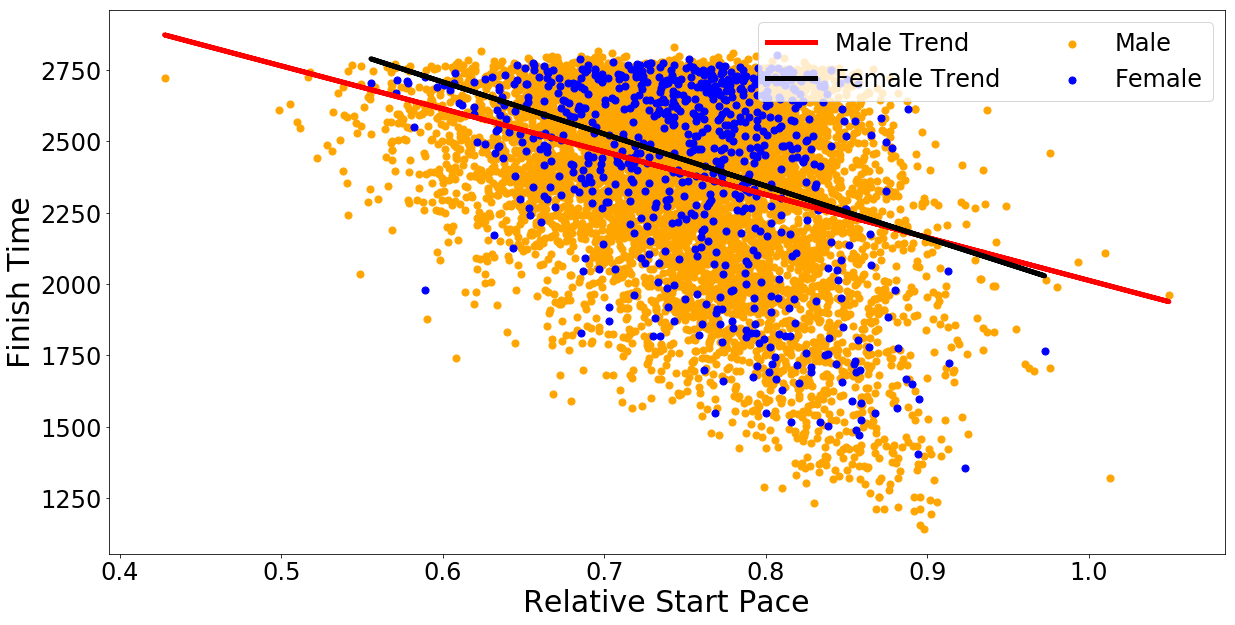

In [534]:
fig = plt.figure()
ax1 = male.plot(kind='scatter', x='Start_Pace', y='time', color='orange', figsize=(20, 10), fontsize = 24, s=50)  
x = male['Start_Pace']
y = male['time']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)
ax2 = female.plot(kind='scatter', x='Start_Pace', y='time', color='blue', ax=ax1, s=50)
x1 = female['Start_Pace']
y1 = female['time']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"k-", linewidth = 5)

ax1.set_ylabel('Finish Time', fontsize = 30)
ax1.set_xlabel('Relative Start Pace', fontsize = 30)
fig.suptitle('Average 1km pace per Category', fontsize=20)
ax1.legend(['Male Trend', 'Female Trend', 'Male', 'Female'], frameon = True, ncol=2, loc='upper right', fontsize = 24)

The first thing to note is that nearly all runners start faster than their average pace. However,
the trend line suggests that the slower the runner starts in terms of relative pace, the faster their
finish time will be. The best runners start at around 0.9 of their relative pace. The faster the
relative pace the more participants are running slower times. There is one outlying runner who
starts the race running just over 0.4 of his relative pace. This runner finishes with a time of
nearly 2750 minutes, which is among the slowest across all years. Only three runners in the entire
data set start slower than their relative pace. The female runners follow the same trend as male
runners. The slower they start the better they perform. The best female runners all start between
0.75 and 0.95 of their relative pace. This seems to be the best strategy, as it is still a fast start,
but also conserves energy.

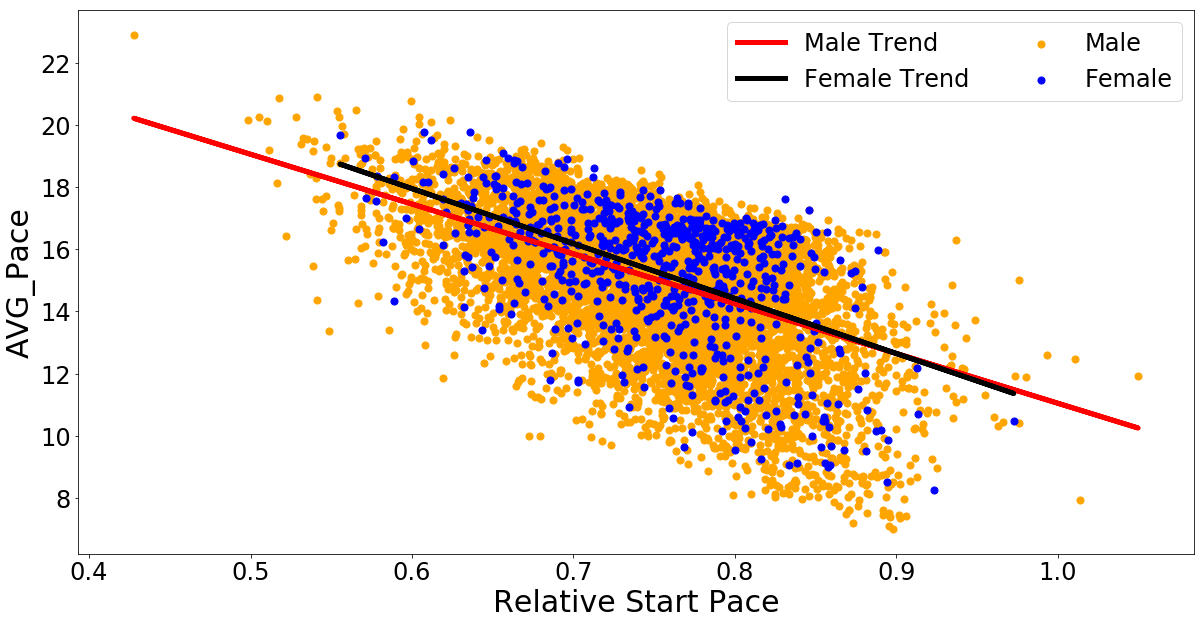

In [535]:
fig = plt.figure()
ax1 = male.plot(kind='scatter', x='Start_Pace', y='AVG_Pace', color='orange', figsize=(20, 10), fontsize = 24, s=50)  
x = male['Start_Pace']
y = male['AVG_Pace']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)
ax2 = female.plot(kind='scatter', x='Start_Pace', y='AVG_Pace', color='blue', ax=ax1, s=50)
x1 = female['Start_Pace']
y1 = female['AVG_Pace']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"k-", linewidth = 5)

ax1.set_ylabel('AVG_Pace', fontsize = 30)
ax1.set_xlabel('Relative Start Pace', fontsize = 30)
fig.suptitle('Average 1km pace per Category', fontsize=20)
ax1.legend(['Male Trend', 'Female Trend', 'Male', 'Female'], frameon = True, ncol=2, loc='upper right', fontsize = 24)

### Start Pace vs Finish Time (3 Stages)

In [536]:
df4 = df4.join(gender)

In [537]:
df4.head()

,Chamonix to Delevret,Delevret to St-Gervais,St-Gervais to Contamines,AVG_Pace,time,Start_Pace,Fast,Slow,gender
0,0.753222,0.623899,0.776253,7.012357,1141.900000,0.717791,True,False,Male
1,0.725186,0.636801,0.775141,7.097568,1156.983333,0.712376,True,False,Male
2,0.754073,0.594760,0.748073,7.352225,1193.000000,0.698969,True,False,Male
3,0.707568,0.586535,0.728818,7.466542,1203.650000,0.674307,True,False,Male
4,0.713602,0.588763,0.774160,7.211069,1211.633333,0.692175,True,False,Male


In [538]:
male = df4.loc[df4['gender'] == 'Male']
female = df4.loc[df4['gender'] == 'Female']

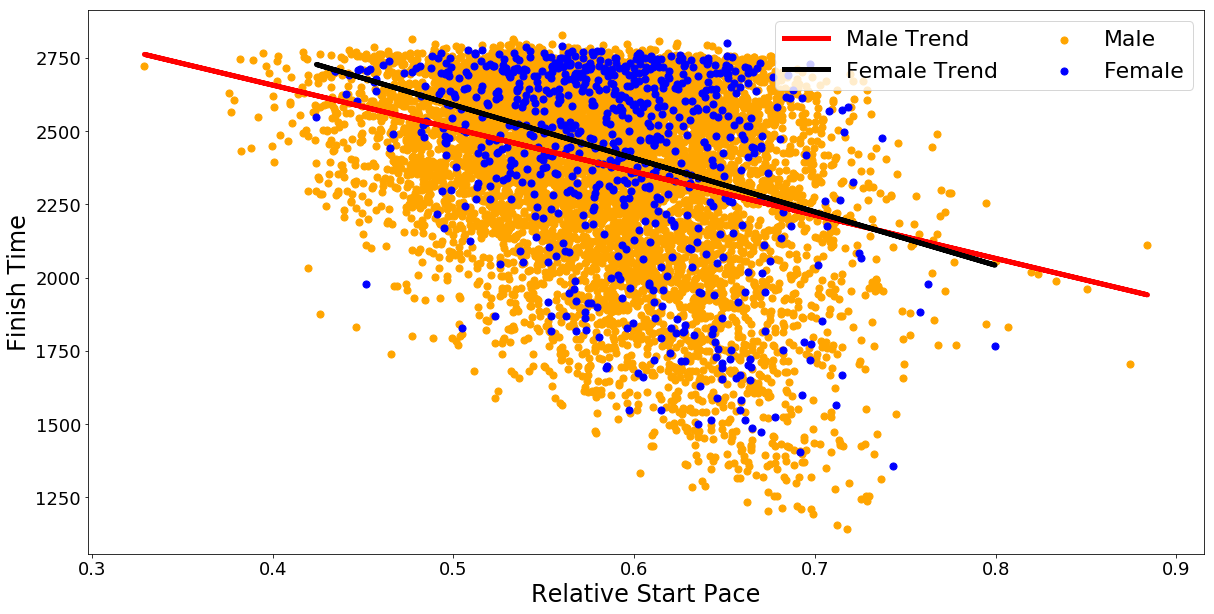

In [539]:
fig = plt.figure()
ax1 = male.plot(kind='scatter', x='Start_Pace', y='time', color='orange', figsize=(20, 10), fontsize = 18, s=50)  
x = male['Start_Pace']
y = male['time']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)
ax2 = female.plot(kind='scatter', x='Start_Pace', y='time', color='blue', ax=ax1, s=50)
x1 = female['Start_Pace']
y1 = female['time']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"k-", linewidth = 5)

ax1.set_ylabel('Finish Time', fontsize = 24)
ax1.set_xlabel('Relative Start Pace', fontsize = 24)
fig.suptitle('Average 1km pace per Category', fontsize=20)
ax1.legend(['Male Trend', 'Female Trend', 'Male', 'Female'], frameon = True, ncol=2, loc='upper right', fontsize = 22)

### Start Pace vs Finish Time (2 Stages)

In [540]:
df3 = df3.join(gender)

In [541]:
df3.head()

,Chamonix to Delevret,Delevret to St-Gervais,AVG_Pace,time,Start_Pace,Fast,Slow,gender
0,0.753222,0.623899,7.012357,1141.900000,0.688560,True,False,Male
1,0.725186,0.636801,7.097568,1156.983333,0.680993,True,False,Male
2,0.754073,0.594760,7.352225,1193.000000,0.674417,True,False,Male
3,0.707568,0.586535,7.466542,1203.650000,0.647051,True,False,Male
4,0.713602,0.588763,7.211069,1211.633333,0.651183,True,False,Male


In [542]:
male = df3.loc[df3['gender'] == 'Male']
female = df3.loc[df3['gender'] == 'Female']

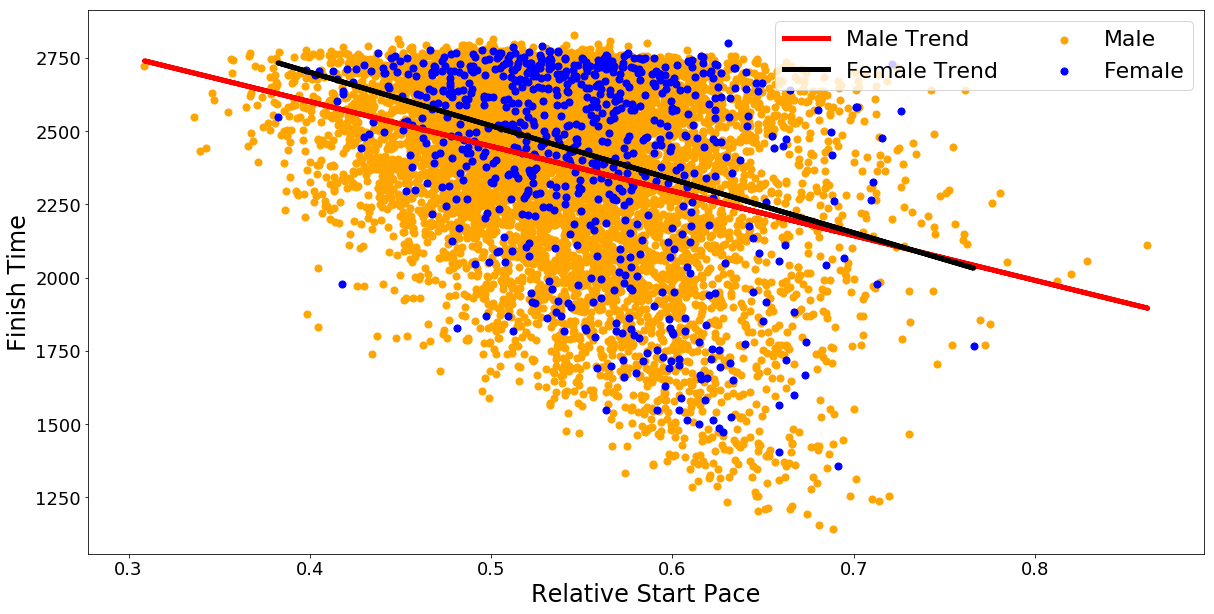

In [543]:
fig = plt.figure()
ax1 = male.plot(kind='scatter', x='Start_Pace', y='time', color='orange', figsize=(20, 10), fontsize = 18, s=50)  
x = male['Start_Pace']
y = male['time']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)
ax2 = female.plot(kind='scatter', x='Start_Pace', y='time', color='blue', ax=ax1, s=50)
x1 = female['Start_Pace']
y1 = female['time']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"k-", linewidth = 5)

ax1.set_ylabel('Finish Time', fontsize = 24)
ax1.set_xlabel('Relative Start Pace', fontsize = 24)
fig.suptitle('Average 1km pace per Category', fontsize=20)
ax1.legend(['Male Trend', 'Female Trend', 'Male', 'Female'], frameon = True, ncol=2, loc='upper right', fontsize = 22)

### Club vs Non Club

One would presume that club runners have a major advantage, with
access to a structured training regime and help from teammates.


In [544]:
df = df.join(team)

In [545]:
df['team'].loc[~df['team'].isnull()] = 1

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [546]:
df['team'] = df['team'].fillna(0)

In [547]:
df.groupby('team').count()

,Chamonix to Delevret,Delevret to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,AVG_Pace,time,Start_Pace,Fast,Slow,rel_AVG_Pace,gender
team,,,,,,,,,,,,
0,3855,3855,3855,3855,3855,3855,3855,3855,3855,3855,3855,3855
1,5247,5247,5247,5247,5247,5247,5247,5247,5247,5247,5247,5247


In [548]:
yesteam = df.loc[df['team'] == 1]
noteam = df.loc[df['team'] == 0]

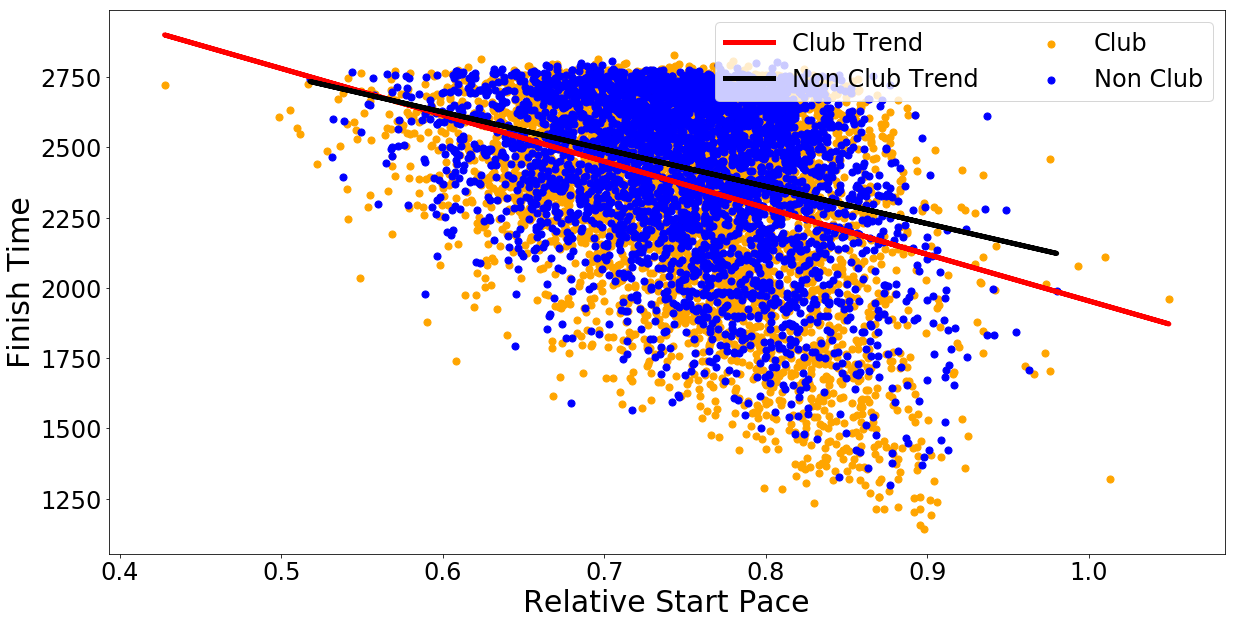

In [549]:
fig = plt.figure()
ax1 = yesteam.plot(kind='scatter', x='Start_Pace', y='time', color='orange', figsize=(20, 10), fontsize = 24, s=50)  
x = yesteam['Start_Pace']
y = yesteam['time']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)
ax2 = noteam.plot(kind='scatter', x='Start_Pace', y='time', color='blue', ax=ax1, s=50)
x1 = noteam['Start_Pace']
y1 = noteam['time']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"k-", linewidth = 5)

ax1.set_ylabel('Finish Time', fontsize = 30)
ax1.set_xlabel('Relative Start Pace', fontsize = 30)
fig.suptitle('Average 1km pace per Category', fontsize=20)
ax1.legend(['Club Trend', 'Non Club Trend', 'Club', 'Non Club'], frameon = True, ncol=2, loc='upper right', fontsize = 24)

It seems most of the very elite runners are part of a team. There are very few non-club runners
who run below a time of 1500 minutes. However, there are still a large number of athletes who
are not members of a club who finish under 2000 minutes. Above 2000 minutes, the athletes are
almost evenly split between club runners and non-club runners. This tells us two things: (1) Most
elite athletes are club runners, so if a runner wants to run under 1500, they are better served
joining a club. (2) If a runner is only focused on finishing the race, it does not make a difference
whether they are a club runner or not.

### Club and Female

In [550]:
female = df.loc[df['gender'] == 'Female']

In [551]:
fyesteam = female.loc[female['team'] == 1]
fnoteam = female.loc[female['team'] == 0]

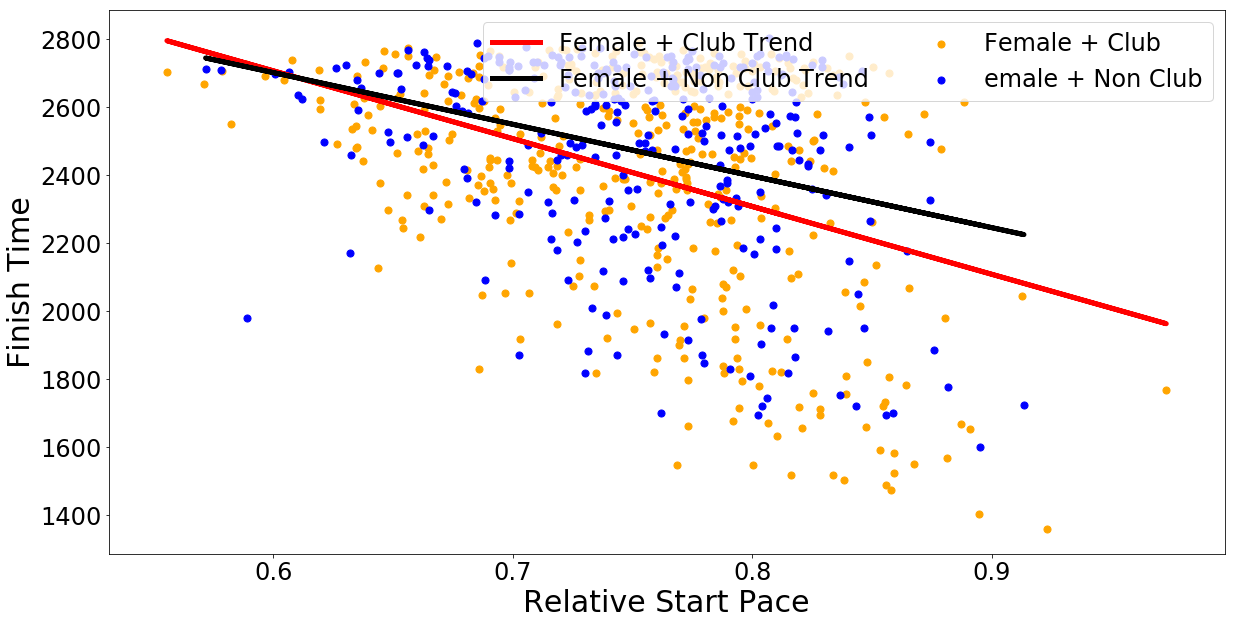

In [552]:
fig = plt.figure()
ax1 = fyesteam.plot(kind='scatter', x='Start_Pace', y='time', color='orange', figsize=(20, 10), fontsize = 24, s=50)  
x = fyesteam['Start_Pace']
y = fyesteam['time']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)
ax2 = fnoteam.plot(kind='scatter', x='Start_Pace', y='time', color='blue', ax=ax1, s=50)
x1 = fnoteam['Start_Pace']
y1 = fnoteam['time']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"k-", linewidth = 5)

ax1.set_ylabel('Finish Time', fontsize = 30)
ax1.set_xlabel('Relative Start Pace', fontsize = 30)
fig.suptitle('Average 1km pace per Category', fontsize=20)
ax1.legend(['Female + Club Trend', 'Female + Non Club Trend', 'Female + Club', 'emale + Non Club'], frameon = True, ncol=2, loc='upper right', fontsize = 24)

The majority of the elite female runners are members of a club. However, for all female runners
who finish under 2000 minutes, more than 25% of those are non-club runners. This tells us that
non-club female runners are over-performing in relation to their participation level. Therefore,
for females, it does not seem that being a member of a club is an advantage when running the
UTMB

# Completion Rate

In [553]:
d = {'Year': [2008, 2009, 2011, 2013, 2014, 2015, 2016, 2017], 'Finishers': [1268, 1383, 1133, 1686, 1582, 1631, 1468, 1687],
    'Non-Finishers': [1108, 903, 1235, 782, 849, 930, 1086, 848]}
comp = pd.DataFrame(data=d)
comp = comp.set_index('Year')
comp

,Finishers,Non-Finishers
Year,,
2008,1268,1108
2009,1383,903
2011,1133,1235
2013,1686,782
2014,1582,849
2015,1631,930
2016,1468,1086
2017,1687,848


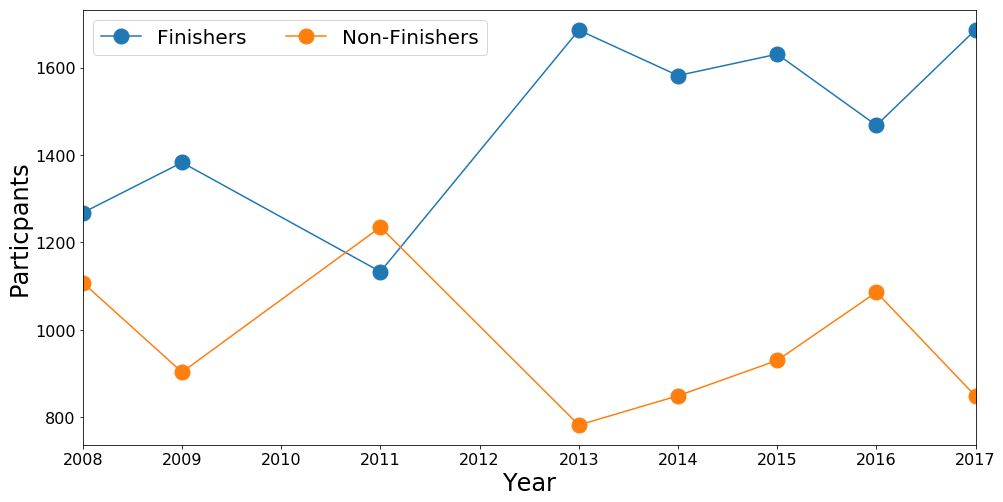

In [554]:

ax = comp.plot(figsize=(16, 8), fontsize=16, marker='o', ms=15)
ax.set_ylabel('Particpants', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend(['Finishers', 'Non-Finishers'], frameon=True, ncol=2, loc='upper left', fontsize=20)

# Completion Rate

In [555]:
d = {'Year': [2008, 2009, 2011, 2013, 2014, 2015, 2016, 2017], 'Finishers': [1268, 1383, 1133, 1686, 1582, 1631, 1468, 1687],
    'Non-Finishers': [1108, 903, 1235, 782, 849, 930, 1086, 848]}
comp = pd.DataFrame(data=d)
comp = comp.set_index('Year')
comp

,Finishers,Non-Finishers
Year,,
2008,1268,1108
2009,1383,903
2011,1133,1235
2013,1686,782
2014,1582,849
2015,1631,930
2016,1468,1086
2017,1687,848


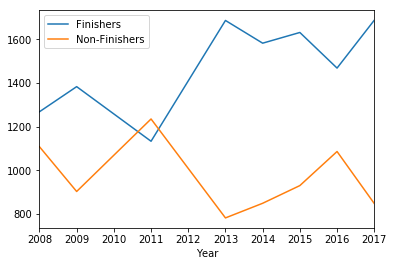

In [556]:
comp.plot()

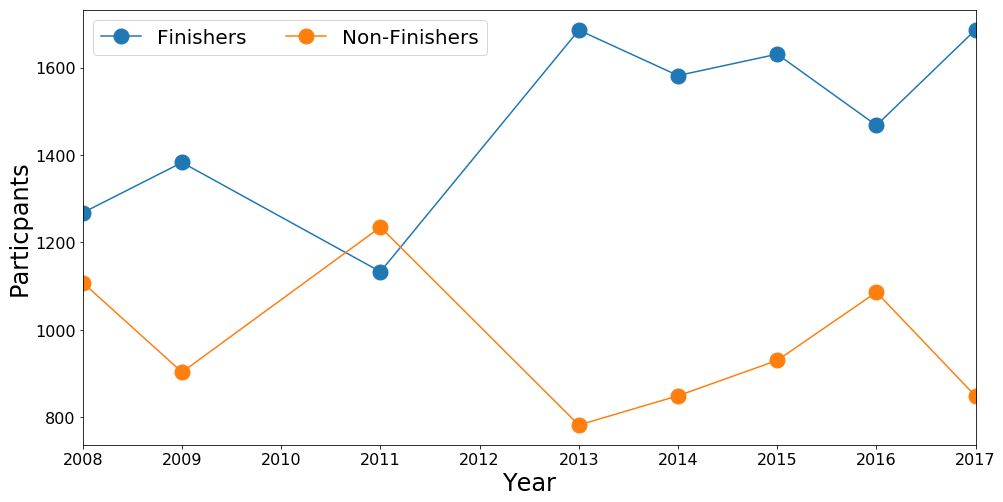

In [557]:

ax = comp.plot(figsize=(16, 8), fontsize=16, marker='o', ms=15)
ax.set_ylabel('Particpants', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend(['Finishers', 'Non-Finishers'], frameon=True, ncol=2, loc='upper left', fontsize=20)

In [558]:
d = {'Year': [2008, 2009, 2011, 2013, 2014, 2015, 2016, 2017], 
    # 'Male Finishers': [1187, 1282, 1061, 1546, 1468, 1499, 1557, 1540],
  #  'Male Non-Finishers': [1017, 825, 1121, 699, 764, 840, 960, 753],
    'Female Finishers': [81, 101, 72, 140, 114, 132, 131, 147],
    'Female Non-Finishers': [91, 78, 114, 83, 85, 90, 126, 95]}
comp = pd.DataFrame(data=d)
comp = comp.set_index('Year')
comp1 = comp
comp1

,Female Finishers,Female Non-Finishers
Year,,
2008,81,91
2009,101,78
2011,72,114
2013,140,83
2014,114,85
2015,132,90
2016,131,126
2017,147,95


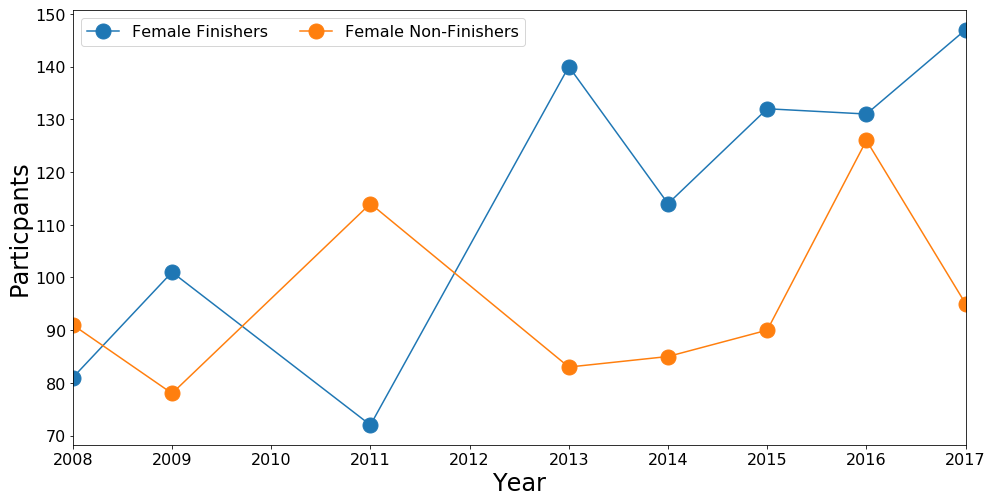

In [559]:
ax = comp.plot(figsize=(16, 8), fontsize=16, marker='o', ms=15)
ax.set_ylabel('Particpants', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend(['Female Finishers', 'Female Non-Finishers', 'Male Finishers', 'Male Non-Finishers'], frameon=True, ncol=2, loc='upper left', fontsize=16)

In [560]:
d = {'Year': [2008, 2009, 2011, 2013, 2014, 2015, 2016, 2017], 
     'Male Finishers': [1187, 1282, 1061, 1546, 1468, 1499, 1557, 1540],
   'Male Non-Finishers': [1017, 825, 1121, 699, 764, 840, 960, 753]}
   # 'Female Finishers': [81, 101, 72, 140, 114, 132, 131, 147],
   # 'Female Non-Finishers': [91, 78, 114, 83, 85, 90, 126, 95]}
comp = pd.DataFrame(data=d)
comp = comp.set_index('Year')
comp

,Male Finishers,Male Non-Finishers
Year,,
2008,1187,1017
2009,1282,825
2011,1061,1121
2013,1546,699
2014,1468,764
2015,1499,840
2016,1557,960
2017,1540,753


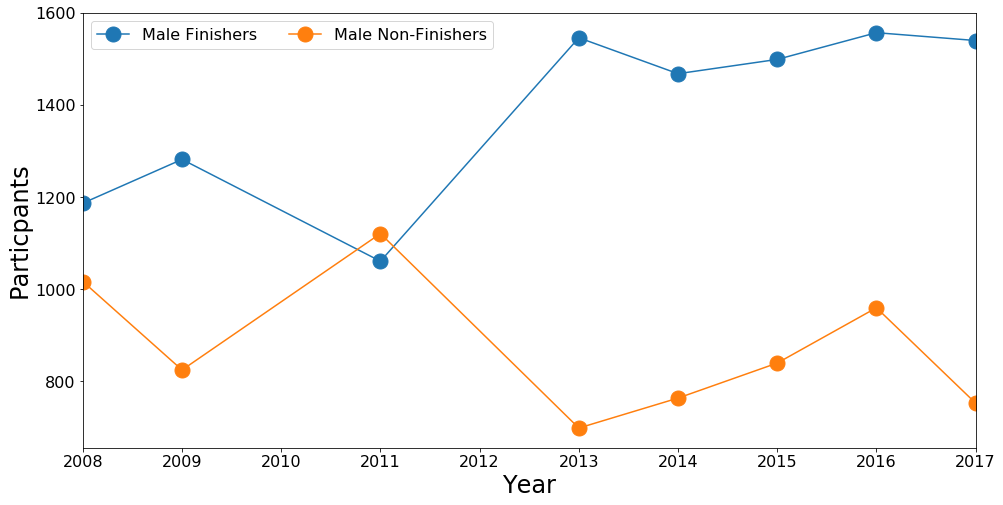

In [561]:
ax = comp.plot(figsize=(16, 8), fontsize=16, marker='o', ms=15)
ax.set_ylabel('Particpants', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend([ 'Male Finishers', 'Male Non-Finishers'], frameon=True, ncol=2, loc='upper left', fontsize=16)

In [562]:
frame_test = [comp, comp1]
coop = pd.concat(frame_test)

In [563]:
coop

,Female Finishers,Female Non-Finishers,Male Finishers,Male Non-Finishers
Year,,,,
2008,NaN,NaN,1187.0,1017.0
2009,NaN,NaN,1282.0,825.0
2011,NaN,NaN,1061.0,1121.0
2013,NaN,NaN,1546.0,699.0
2014,NaN,NaN,1468.0,764.0
2015,NaN,NaN,1499.0,840.0
2016,NaN,NaN,1557.0,960.0
2017,NaN,NaN,1540.0,753.0
2008,81.0,91.0,NaN,NaN


In [564]:
result = comp.join(comp1)

In [565]:
result

,Male Finishers,Male Non-Finishers,Female Finishers,Female Non-Finishers
Year,,,,
2008,1187,1017,81,91
2009,1282,825,101,78
2011,1061,1121,72,114
2013,1546,699,140,83
2014,1468,764,114,85
2015,1499,840,132,90
2016,1557,960,131,126
2017,1540,753,147,95


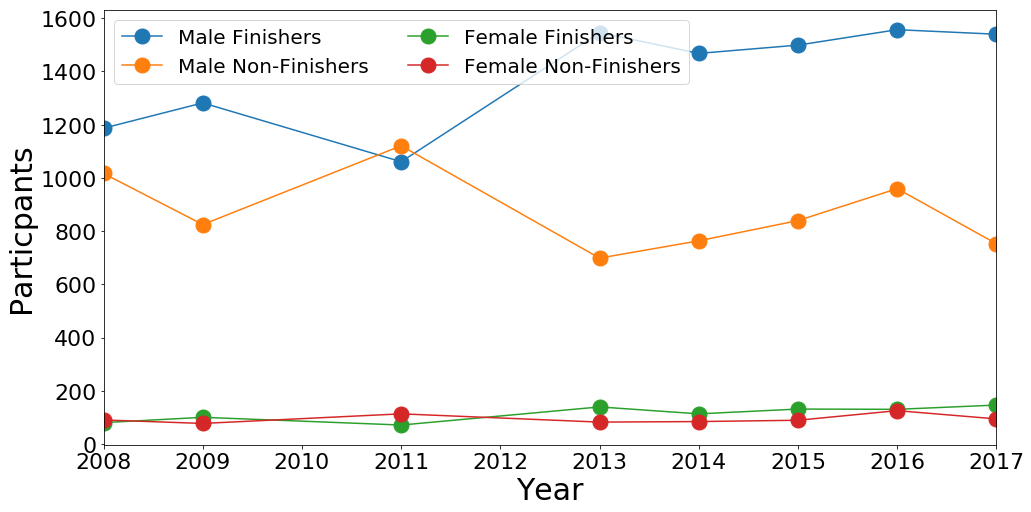

In [566]:
ax = result.plot(figsize=(16, 8), fontsize=22, marker='o', ms=15)
ax.set_ylabel('Particpants', fontsize = 30)
ax.set_xlabel('Year', fontsize = 30)
ax.legend([ 'Male Finishers', 'Male Non-Finishers', 'Female Finishers', 'Female Non-Finishers'], frameon=True, ncol=2, loc='best', fontsize=20)